<h2 style="text-align: center;"> Business Case: Netflix - Data Exploration and Visualisation</h2><br>

![Netflix](netflix.png "https://cdn.freebiesupply.com/logos/large/2x/netflix-2-logo-png-transparent.png") 

<br>

#### About NETFLIX
Netflix is a streaming platform that offers online access to a vast library of TV shows, movies, documentaries, and more. It was founded in 1997 as a DVD-by-mail service and has since evolved into one of the largest streaming platforms in the world. With Netflix, users can watch their favorite content anytime, anywhere, on a variety of devices including smart TVs, laptops, smartphones, and tablets. In addition to offering a large selection of licensed content from major studios and networks, Netflix has also invested heavily in producing original content, such as the popular series. The company operates in over 190 countries and has millions of subscribers worldwide. Overall, Netflix has revolutionized the way people watch TV and movies and has become an indispensable part of the entertainment landscape for millions of people around the world.

#### Business Problem
Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

<b>Columns info:-</b>
- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

#### Analysis should answer following business problem questions:-
1. How has the number of movies released per year changed over the last 20-30 years?
2. Comparison of tv shows vs. movies.
3. What is the best time to launch a TV show?
4. Analysis of actors/directors of different types of shows/movies.
5. Does Netflix has more focus on TV Shows than movies in recent years
6. Understanding what content is available in different countries

In [1]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns # All palettes -> https://r02b.github.io/seaborn_palettes/
sns.set_theme(style="whitegrid")

import matplotlib.pylab as pylab
params = {
    'figure.titlesize': 'xx-large',
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

import plotly.express as px 
from wordcloud import WordCloud
import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_link = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'
df = pd.read_csv(dataset_link)
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [3]:
# checking shape
df.shape

(8807, 12)

In [4]:
#columns info
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# duplicate rows ?
df.duplicated().any()

False

In [7]:
# Missing values per column

missing_info = df.isnull().sum()
for i in range(len(missing_info)):
    if missing_info[i] > 0:
        print('Total number of missing values in ' + missing_info.index[i] + ': ', missing_info[i])

Total number of missing values in director:  2634
Total number of missing values in cast:  825
Total number of missing values in country:  831
Total number of missing values in date_added:  10
Total number of missing values in rating:  4
Total number of missing values in duration:  3


<Axes: >

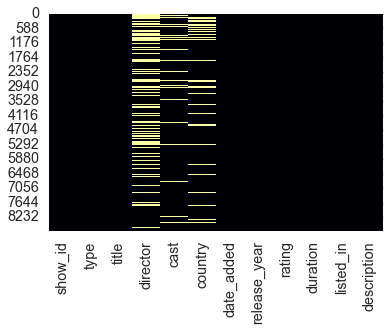

In [8]:
# heatmap for same
sns.heatmap(df.isnull(),cmap = 'inferno', cbar = False)

In [9]:
# Percentage of null data for each column
df.isna().sum() / df.shape[0] * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [10]:
# Percentage of unique data for each column
df.nunique() / df.shape[0] * 100

show_id         100.000000
type              0.022709
title           100.000000
director         51.413648
cast             87.339616
country           8.493244
date_added       20.063586
release_year      0.840241
rating            0.193028
duration          2.498013
listed_in         5.836267
description      99.636653
dtype: float64

### Missing values fix: duration

In [11]:
df[df['duration'].isna()]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year  rating  \
5541  Louis C.K.  United States       April 4, 2017          2017  74 min   
5794  Louis C.K.  United States  September 16, 2016          2010  84 min   
5813  Louis C.K.  United States     August 15, 2016          2015  66 min   

     duration listed_in                                        description  
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794      NaN    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813      NaN    Movies  The comic puts his trademark hilarious/thought...

In [12]:
# If we observe the columns of rating & duration, we can see that there is a value mismatch present.
# Hence, we will switch the values of the above index values from rating column to duration column.

In [13]:
index = list(df[df['duration'].isna()].index)
df.loc[index, 'duration'] = df.loc[index, 'rating']
df.loc[index,'rating'] = np.nan
df.loc[index,:]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country          date_added  release_year rating  \
5541  Louis C.K.  United States       April 4, 2017          2017    NaN   
5794  Louis C.K.  United States  September 16, 2016          2010    NaN   
5813  Louis C.K.  United States     August 15, 2016          2015    NaN   

     duration listed_in                                        description  
5541   74 min    Movies  Louis C.K. muses on religion, eternal love, gi...  
5794   84 min    Movies  Emmy-winning comedy writer Louis C.K. brings h...  
5813   66 min    Movies  The comic puts his trademark hilarious/thought...

In [14]:
df['duration'].isna().sum()

0

In [15]:
df['rating'].isna().sum()

7

In [16]:
# missing values have been transferred from duration to rating!

### Missing values fix: rating

In [17]:
#rating

In [18]:
df['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [19]:
df['rating'].mode()

# Due to the imbalance nature of the rating feature, thus replacing with mode

0    TV-MA
Name: rating, dtype: object

In [20]:
df['rating'].fillna(df['rating'].mode()[0], inplace = True)

In [21]:
df['rating'].isna().sum()

0

### Missing values fix: date_added

In [22]:
# date added

In [23]:
df[df['date_added'].isna()]

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown      NaN   
6795   s6796  TV Show                                      Frasier      NaN   
6806   s6807  TV Show                                      Friends      NaN   
6901   s6902  TV Show                              Gunslinger Girl      NaN   
7196   s7197  TV Show                                     Kikoriki      NaN   
7254   s7255  TV Show                          La Familia P. Luche      NaN   
7406   s7407  TV Show                                        Maron      NaN   
7847   s7848  TV Show                                 Red vs. Blue      NaN   
8182   s8183  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6174                                   Anthony Bourdain   United States   
6795  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
6806  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
6901  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
7196                                      Igor Dmitriev             NaN   
7254  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
7406  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7847  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
8182  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

     date_added  release_year rating    duration  \
6066        NaN          2013  TV-MA   2 Seasons   
6174        NaN          2018  TV-PG   5 Seasons   
6795        NaN          2003  TV-PG  11 Seasons   
6806        NaN          2003  TV-14  10 Seasons   
6901        NaN          2008  TV-14   2 Seasons   
7196        NaN          2010   TV-Y   2 Seasons   
7254        NaN          2012  TV-14   3 Seasons   
7406        NaN          2016  TV-MA   4 Seasons   
7847        NaN          2015     NR  13 Seasons   
8182        NaN          2015  TV-Y7   2 Seasons   

                                              listed_in  \
6066           British TV Shows, TV Comedies, TV Dramas   
6174                                         Docuseries   
6795                     Classic & Cult TV, TV Comedies   
6806                     Classic & Cult TV, TV Comedies   
6901                       Anime Series, Crime TV Shows   
7196                                           Kids' TV   
7254  International TV Shows, Spanish-Language TV Sh...   
7406                                        TV Comedies   
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
8182                              Kids' TV, TV Comedies   

                                            description  
6066  Set during the Russian Revolution, this comic ...  
6174  This CNN original series has chef Anthony Bour...  
6795  Frasier Crane is a snooty but lovable Seattle ...  
6806  This hit sitcom follows the merry misadventure...  
6901  On the surface, the Social Welfare Agency appe...  
7196  A wacky rabbit and his gang of animal pals hav...  
7254  This irreverent sitcom featues Ludovico, Feder...  
7406  Marc Maron stars as Marc Maron, who interviews...  
7847  This parody of first-person shooter games, mil...  
8182  Imagine your worst fears, then multiply them: ...

In [24]:
# fill the missing values with the 1st January of it's release_year!

In [25]:
index = list(df[df.isnull()['date_added'] == True].index)
df.loc[index, 'date_added'] = ['January 1, ' + str(i) for i in df.loc[index, 'release_year']]
df.loc[index, :]

show_id     type                                        title director  \
6066   s6067  TV Show  A Young Doctor's Notebook and Other Stories      NaN   
6174   s6175  TV Show              Anthony Bourdain: Parts Unknown      NaN   
6795   s6796  TV Show                                      Frasier      NaN   
6806   s6807  TV Show                                      Friends      NaN   
6901   s6902  TV Show                              Gunslinger Girl      NaN   
7196   s7197  TV Show                                     Kikoriki      NaN   
7254   s7255  TV Show                          La Familia P. Luche      NaN   
7406   s7407  TV Show                                        Maron      NaN   
7847   s7848  TV Show                                 Red vs. Blue      NaN   
8182   s8183  TV Show                 The Adventures of Figaro Pho      NaN   

                                                   cast         country  \
6066  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6174                                   Anthony Bourdain   United States   
6795  Kelsey Grammer, Jane Leeves, David Hyde Pierce...   United States   
6806  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   
6901  Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...           Japan   
7196                                      Igor Dmitriev             NaN   
7254  Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...   United States   
7406  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
7847  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
8182  Luke Jurevicius, Craig Behenna, Charlotte Haml...       Australia   

           date_added  release_year rating    duration  \
6066  January 1, 2013          2013  TV-MA   2 Seasons   
6174  January 1, 2018          2018  TV-PG   5 Seasons   
6795  January 1, 2003          2003  TV-PG  11 Seasons   
6806  January 1, 2003          2003  TV-14  10 Seasons   
6901  January 1, 2008          2008  TV-14   2 Seasons   
7196  January 1, 2010          2010   TV-Y   2 Seasons   
7254  January 1, 2012          2012  TV-14   3 Seasons   
7406  January 1, 2016          2016  TV-MA   4 Seasons   
7847  January 1, 2015          2015     NR  13 Seasons   
8182  January 1, 2015          2015  TV-Y7   2 Seasons   

                                              listed_in  \
6066           British TV Shows, TV Comedies, TV Dramas   
6174                                         Docuseries   
6795                     Classic & Cult TV, TV Comedies   
6806                     Classic & Cult TV, TV Comedies   
6901                       Anime Series, Crime TV Shows   
7196                                           Kids' TV   
7254  International TV Shows, Spanish-Language TV Sh...   
7406                                        TV Comedies   
7847  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
8182                              Kids' TV, TV Comedies   

                                            description  
6066  Set during the Russian Revolution, this comic ...  
6174  This CNN original series has chef Anthony Bour...  
6795  Frasier Crane is a snooty but lovable Seattle ...  
6806  This hit sitcom follows the merry misadventure...  
6901  On the surface, the Social Welfare Agency appe...  
7196  A wacky rabbit and his gang of animal pals hav...  
7254  This irreverent sitcom featues Ludovico, Feder...  
7406  Marc Maron stars as Marc Maron, who interviews...  
7847  This parody of first-person shooter games, mil...  
8182  Imagine your worst fears, then multiply them: ...

- director: This column has about 30% missing values and about 52% of unique data, hence it does not provide much information for our analysis.
- cast: This column has about 9% missing values and about 88% of unique data, hence is also does not provide significant information for analysis. 
- country: We can replace the missing values with 'United States' since Netflix is originated from United States and most of the movies and TV shows are aired in there. Statistically, looking at the mode of the country column also confirm that 'United States' can be a great replacement for the missing values.

#### But instead we will do the following for country, cast & director column:- 
#### Normalizing data and keeping as seperate one-to-many data in another table for further analysis 
#### Also doing same with listed_in column since it has nested data too

### Missing values fix: country, cast  & director

In [26]:
#country - normalizing data (having seperate one-to-many tables for each column) 
# and keeping as one to many data in another table for further analysis

In [27]:
df_country = df[['show_id', 'country']].copy() 
df_country = df_country[df_country['country'].notna()]
df_country['country'] = df_country['country'].apply(lambda country: country.split(', '))
df_country = df_country.explode('country').reset_index(drop=True)
df_country.shape, df_country.head()

((10014, 2),
   show_id        country
 0      s1  United States
 1      s2   South Africa
 2      s5          India
 3      s8  United States
 4      s8          Ghana)

In [28]:
#cast - normalizing data and keeping as one to many data in another table for further analysis

In [29]:
df_cast = df[['show_id', 'cast']].copy() 
df_cast = df_cast[df_cast['cast'].notna()]
df_cast['cast'] = df_cast['cast'].apply(lambda cast: cast.split(', '))
df_cast = df_cast.explode('cast').reset_index(drop=True)
df_cast.shape, df_cast.head()

((64126, 2),
   show_id              cast
 0      s2        Ama Qamata
 1      s2       Khosi Ngema
 2      s2     Gail Mabalane
 3      s2    Thabang Molaba
 4      s2  Dillon Windvogel)

In [30]:
#director - normalizing data and keeping as one to many data in another table for further analysis

In [31]:
df_director = df[['show_id', 'director']].copy() 
df_director = df_director[df_director['director'].notna()]
df_director['director'] = df_director['director'].apply(lambda genre: genre.split(', '))
df_director = df_director.explode('director').reset_index(drop=True)
df_director.shape, df_director.head()

((6978, 2),
   show_id         director
 0      s1  Kirsten Johnson
 1      s3  Julien Leclercq
 2      s6    Mike Flanagan
 3      s7    Robert Cullen
 4      s7   José Luis Ucha)

In [32]:
#listed_in - normalizing data and keeping as one to many data in another table for further analysis

In [33]:
df_listed_in = df[['show_id', 'listed_in']].copy() 
df_listed_in = df_listed_in[df_listed_in['listed_in'].notna()]
df_listed_in['listed_in'] = df_listed_in['listed_in'].apply(lambda genre: genre.split(', '))
df_listed_in = df_listed_in.explode('listed_in').reset_index(drop=True)
df_listed_in.shape, df_listed_in.head()

((19323, 2),
   show_id               listed_in
 0      s1           Documentaries
 1      s2  International TV Shows
 2      s2               TV Dramas
 3      s2            TV Mysteries
 4      s3          Crime TV Shows)

In [34]:
# keeping description in another table as well since it will not be actively used in analysis

In [36]:
df_description = df[['show_id', 'description']].copy() 
df_description.shape, df_description.head()

((8807, 2),
   show_id                                        description
 0      s1  As her father nears the end of his life, filmm...
 1      s2  After crossing paths at a party, a Cape Town t...
 2      s3  To protect his family from a powerful drug lor...
 3      s4  Feuds, flirtations and toilet talk go down amo...
 4      s5  In a city of coaching centers known to train I...)

In [37]:
# removing above columns from main data frame

In [38]:
df.drop(['country', 'cast', 'listed_in', 'director', 'description'], axis = 1, inplace = True)

In [39]:
###### FINAL DATAFRAME

In [40]:
df.head()

show_id     type                  title          date_added  release_year  \
0      s1    Movie   Dick Johnson Is Dead  September 25, 2021          2020   
1      s2  TV Show          Blood & Water  September 24, 2021          2021   
2      s3  TV Show              Ganglands  September 24, 2021          2021   
3      s4  TV Show  Jailbirds New Orleans  September 24, 2021          2021   
4      s5  TV Show           Kota Factory  September 24, 2021          2021   

  rating   duration  
0  PG-13     90 min  
1  TV-MA  2 Seasons  
2  TV-MA   1 Season  
3  TV-MA   1 Season  
4  TV-MA  2 Seasons

In [41]:
df.isna().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [42]:
# No null values

In [43]:
# adding some columns for extra details

We can add new features from the date_added column which are month and year.

In [44]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [45]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

In [46]:
df.head()

show_id     type                  title date_added  release_year rating  \
0      s1    Movie   Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1      s2  TV Show          Blood & Water 2021-09-24          2021  TV-MA   
2      s3  TV Show              Ganglands 2021-09-24          2021  TV-MA   
3      s4  TV Show  Jailbirds New Orleans 2021-09-24          2021  TV-MA   
4      s5  TV Show           Kota Factory 2021-09-24          2021  TV-MA   

    duration  year_added month_added  
0     90 min        2021   September  
1  2 Seasons        2021   September  
2   1 Season        2021   September  
3   1 Season        2021   September  
4  2 Seasons        2021   September

In [47]:
#Adding a new column 'target_ages' based on the content 'rating'
# reference -> https://en.wikipedia.org/wiki/Television_content_rating_system

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age_groups'] = df['rating'].replace(ratings_ages)
df.head()

show_id     type                  title date_added  release_year rating  \
0      s1    Movie   Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1      s2  TV Show          Blood & Water 2021-09-24          2021  TV-MA   
2      s3  TV Show              Ganglands 2021-09-24          2021  TV-MA   
3      s4  TV Show  Jailbirds New Orleans 2021-09-24          2021  TV-MA   
4      s5  TV Show           Kota Factory 2021-09-24          2021  TV-MA   

    duration  year_added month_added target_age_groups  
0     90 min        2021   September             Teens  
1  2 Seasons        2021   September            Adults  
2   1 Season        2021   September            Adults  
3   1 Season        2021   September            Adults  
4  2 Seasons        2021   September            Adults

In [48]:
# since tv shows and movies are completely different format - Diving df into both

In [49]:
# All the elements of duration for type = Movie are present in min and Season for type = TV Show.

# Thus, we create a new column that preserves these values and displays 
# the group of minutes it is present in for Movie & total seasons for TV Show.

In [50]:
df_movie = df[df['type']=='Movie'].copy(deep=True).reset_index(drop=True)
df_tv_show = df[df['type']=='TV Show'].copy(deep=True).reset_index(drop=True)
df_movie.shape, df_tv_show.shape

((6131, 10), (2676, 10))

In [51]:
# dropping type in both new df

In [52]:
df_movie.drop('type', axis = 1, inplace = True)
df_tv_show.drop('type', axis = 1, inplace = True)

In [53]:
# duration fix (minutes) in movie df

In [54]:
df_movie['duration'] = df_movie['duration'].apply(lambda x: x.split()[0])
df_movie.head()

show_id                             title date_added  release_year rating  \
0      s1              Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1      s7  My Little Pony: A New Generation 2021-09-24          2021     PG   
2      s8                           Sankofa 2021-09-24          1993  TV-MA   
3     s10                      The Starling 2021-09-24          2021  PG-13   
4     s13                      Je Suis Karl 2021-09-23          2021  TV-MA   

  duration  year_added month_added target_age_groups  
0       90        2021   September             Teens  
1       91        2021   September        Older Kids  
2      125        2021   September            Adults  
3      104        2021   September             Teens  
4      127        2021   September            Adults

In [55]:
df_movie['duration'] = df_movie['duration'].astype('int')
df_movie.head()

show_id                             title date_added  release_year rating  \
0      s1              Dick Johnson Is Dead 2021-09-25          2020  PG-13   
1      s7  My Little Pony: A New Generation 2021-09-24          2021     PG   
2      s8                           Sankofa 2021-09-24          1993  TV-MA   
3     s10                      The Starling 2021-09-24          2021  PG-13   
4     s13                      Je Suis Karl 2021-09-23          2021  TV-MA   

   duration  year_added month_added target_age_groups  
0        90        2021   September             Teens  
1        91        2021   September        Older Kids  
2       125        2021   September            Adults  
3       104        2021   September             Teens  
4       127        2021   September            Adults

In [56]:
# duration fix (seasons) in tv show df

In [57]:
df_tv_show.head()

show_id                  title date_added  release_year rating   duration  \
0      s2          Blood & Water 2021-09-24          2021  TV-MA  2 Seasons   
1      s3              Ganglands 2021-09-24          2021  TV-MA   1 Season   
2      s4  Jailbirds New Orleans 2021-09-24          2021  TV-MA   1 Season   
3      s5           Kota Factory 2021-09-24          2021  TV-MA  2 Seasons   
4      s6          Midnight Mass 2021-09-24          2021  TV-MA   1 Season   

   year_added month_added target_age_groups  
0        2021   September            Adults  
1        2021   September            Adults  
2        2021   September            Adults  
3        2021   September            Adults  
4        2021   September            Adults

In [58]:
df_tv_show['duration'] = df_tv_show['duration'].apply(lambda x: x.split()[0])
df_tv_show.head()

show_id                  title date_added  release_year rating duration  \
0      s2          Blood & Water 2021-09-24          2021  TV-MA        2   
1      s3              Ganglands 2021-09-24          2021  TV-MA        1   
2      s4  Jailbirds New Orleans 2021-09-24          2021  TV-MA        1   
3      s5           Kota Factory 2021-09-24          2021  TV-MA        2   
4      s6          Midnight Mass 2021-09-24          2021  TV-MA        1   

   year_added month_added target_age_groups  
0        2021   September            Adults  
1        2021   September            Adults  
2        2021   September            Adults  
3        2021   September            Adults  
4        2021   September            Adults

In [59]:
df_tv_show['duration'] = df_tv_show['duration'].astype('int')
df_tv_show.head()

show_id                  title date_added  release_year rating  duration  \
0      s2          Blood & Water 2021-09-24          2021  TV-MA         2   
1      s3              Ganglands 2021-09-24          2021  TV-MA         1   
2      s4  Jailbirds New Orleans 2021-09-24          2021  TV-MA         1   
3      s5           Kota Factory 2021-09-24          2021  TV-MA         2   
4      s6          Midnight Mass 2021-09-24          2021  TV-MA         1   

   year_added month_added target_age_groups  
0        2021   September            Adults  
1        2021   September            Adults  
2        2021   September            Adults  
3        2021   September            Adults  
4        2021   September            Adults

In [60]:
###############################################################################

### Columns analysis

In [61]:
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [62]:
df['release_year'].astype('object').describe()

count     8807
unique      74
top       2018
freq      1147
Name: release_year, dtype: int64

In [63]:
# 74 years of data
# most releases in 2018

#### Finding approx number of years after movie/tv show is added on netflix

In [64]:
# finding approx number of years after movie/tv show is added on netflix
difference = df['year_added'] - df['release_year']

In [65]:
difference.describe()

count    8807.000000
mean        4.683093
std         8.783427
min        -3.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        93.000000
dtype: float64

In [66]:
difference.astype('object').describe()

count     8807
unique      75
top          0
freq      3251
dtype: int64

In [67]:
df.loc[difference.argmin(), :] # prolly wrong data

show_id                            s7113
type                             TV Show
title                        Jack Taylor
date_added           2013-03-31 00:00:00
release_year                        2016
rating                             TV-MA
duration                        1 Season
year_added                          2013
month_added                        March
target_age_groups                 Adults
Name: 7112, dtype: object

In [68]:
df.loc[difference.argmax(), :]  # wow

show_id                                          s4251
type                                           TV Show
title                Pioneers: First Women Filmmakers*
date_added                         2018-12-30 00:00:00
release_year                                      1925
rating                                           TV-14
duration                                      1 Season
year_added                                        2018
month_added                                   December
target_age_groups                                Teens
Name: 4250, dtype: object

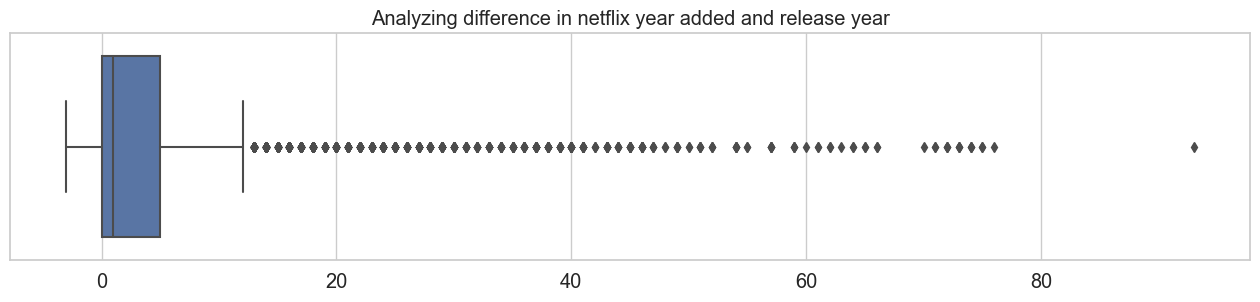

In [69]:
plt.figure(figsize = (16, 3), dpi=100)
sns.boxplot(x=difference)
plt.title('Analyzing difference in netflix year added and release year')
plt.show()

Text(0, 0.5, '')

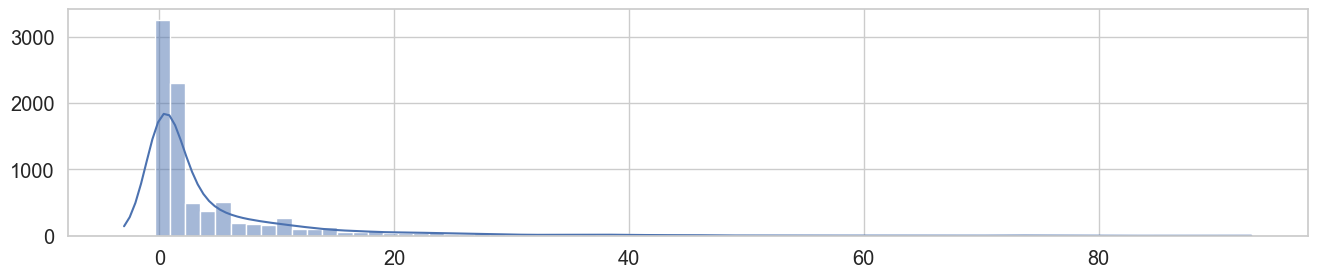

In [70]:
plt.figure(figsize = (16, 3), dpi=100)
sns.histplot(x=difference, kde='reg', bins=74)
plt.ylabel('')

In [71]:
difference.value_counts()[:2]

0    3251
1    1585
Name: count, dtype: int64

In [72]:
# This gives an insight into what will be the better time to add in Netflix which is 0 or either 1

In [73]:
df_movie.duration.describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [76]:
df_movie['duration'].astype('object').describe()

count     6131
unique     205
top         90
freq       152
Name: duration, dtype: int64

In [77]:
# mostly 90 minute movies are made

In [78]:
# max and min movies

print(f"Longest movie: {df_movie.iloc[df_movie['duration'].argmax()]['title']}")
print(f"Shortest movie: {df_movie.iloc[df_movie['duration'].argmin()]['title']}")

Longest movie: Black Mirror: Bandersnatch
Shortest movie: Silent


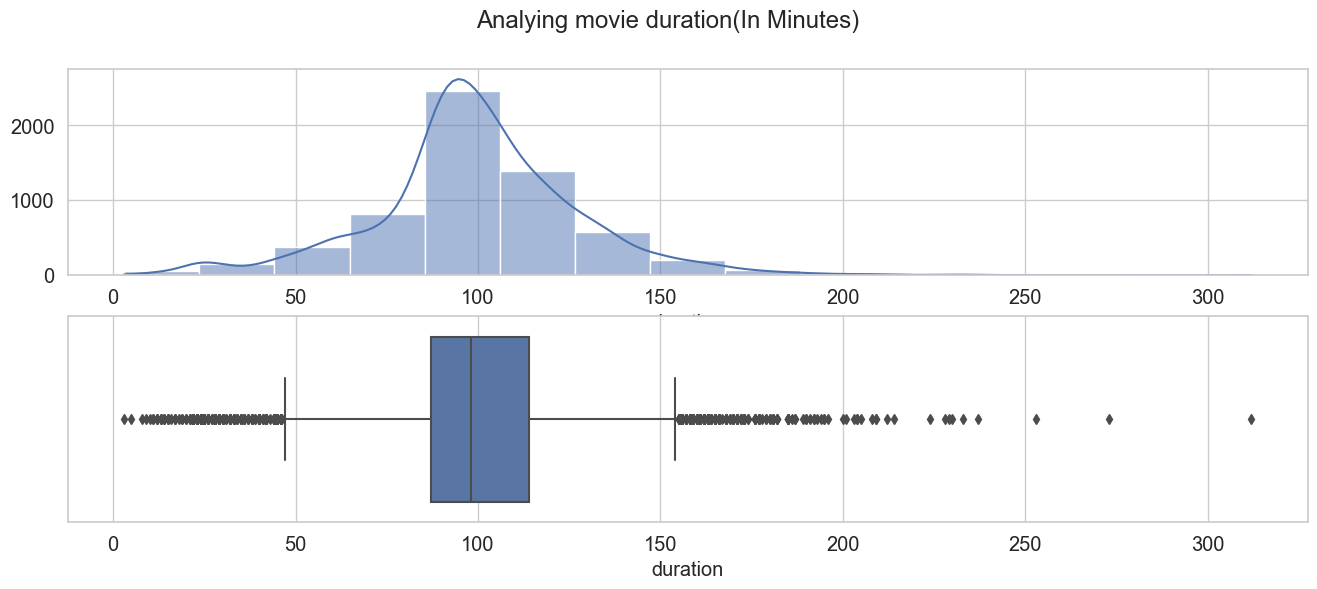

In [79]:
fig = plt.figure(figsize = (16, 6), dpi=100)

fig1 = fig.add_subplot(2,1,1)
sns.histplot(x=df_movie['duration'].astype('int'), kde='reg', bins=15)
plt.ylabel('')

fig.add_subplot(2,1,2, sharex=fig1)
sns.boxplot(x=df_movie['duration'].astype('int'))

plt.suptitle('Analying movie duration(In Minutes)')
plt.show()

In [80]:
df_tv_show.duration.describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [81]:
# mostly tv shows are made of 1 season

In [82]:
df_tv_show['duration'].astype('object').describe()

count     2676
unique      15
top          1
freq      1793
Name: duration, dtype: int64

In [83]:
# There are 1793 tv shows with 1 season only

In [84]:
# max tv show seasons

print(f"TV Show with highest number of season: {df_tv_show.iloc[df_tv_show['duration'].argmin()]['title']}")

TV Show with highest number of season: Ganglands


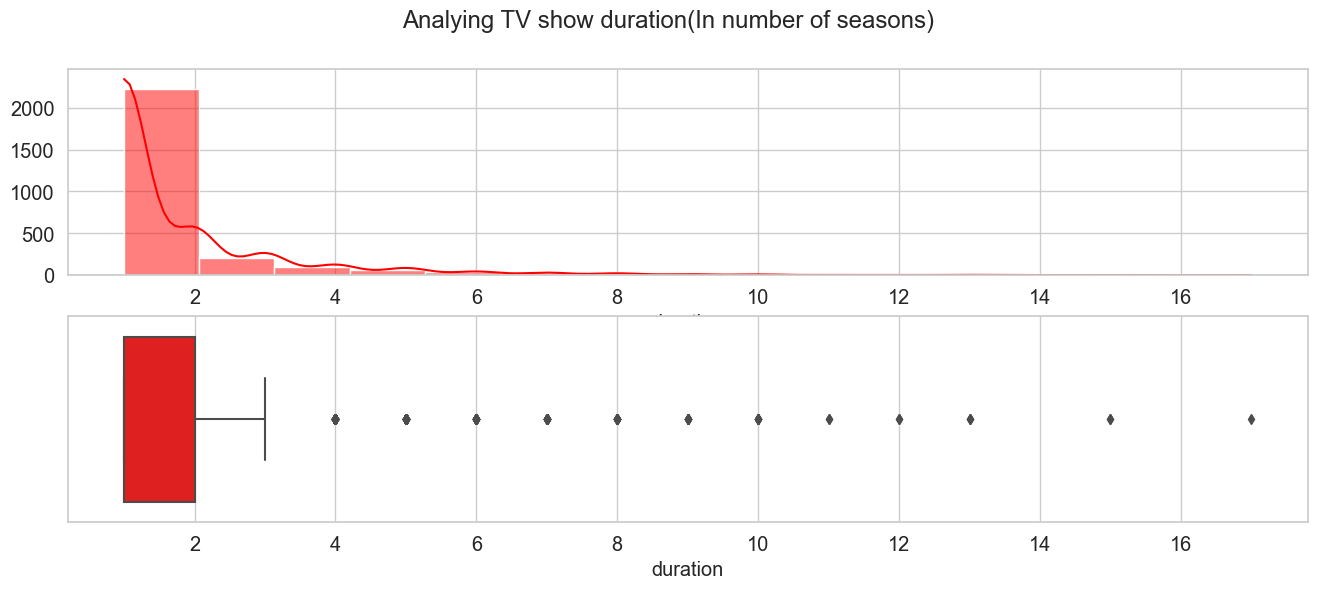

In [85]:
fig = plt.figure(figsize = (16, 6), dpi=100)

fig1 = fig.add_subplot(2,1,1)
sns.histplot(x=df_tv_show['duration'].astype('int'), kde='reg', bins=15, color='red')
plt.ylabel('')

fig.add_subplot(2,1,2, sharex=fig1)
sns.boxplot(x=df_tv_show['duration'].astype('int'), color='red')

plt.suptitle('Analying TV show duration(In number of seasons)')
plt.show()

In [86]:
# Analyzing categorical columns

In [87]:
categorical_columns = ['type', 'rating', 'target_age_groups'] #1-1 mapping with show_id
# 'target_age_groups' is custom made
# ['cast', 'director', 'country', 'listed_in'] #1-many mapping with show_id

def analysis(column):
    print('\n', '#'*50)
    print(f'Analyzing categorical column: ', end='')
    print(df[column].value_counts().to_string())
    print('#'*5, f'Unique value count: {df[column].nunique()}')

for col in categorical_columns:
    analysis(col)


 ##################################################
Analyzing categorical column: type
Movie      6131
TV Show    2676
##### Unique value count: 2

 ##################################################
Analyzing categorical column: rating
TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
##### Unique value count: 14

 ##################################################
Analyzing categorical column: target_age_groups
Adults        4099
Teens         2650
Older Kids    1490
Kids           568
##### Unique value count: 4


In [88]:
# cast
df_cast['cast'].value_counts()

cast
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

In [89]:
# director
df_director['director'].value_counts()

director
Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: count, Length: 4993, dtype: int64

In [90]:
# country
df_country['country'].value_counts()

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: count, Length: 127, dtype: int64

In [91]:
# listed_in / genre
df_listed_in['listed_in'].value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [92]:
# What are the 20 oldest movies on Netflix?
df_movie.sort_values("release_year", ascending = True)[['title', "release_year"]][:20]

title  release_year
5299                                    Prelude to War          1942
5638                              The Battle of Midway          1942
6010     Undercover: How to Operate Behind Enemy Lines          1943
6096                   WWII: Report from the Aleutians          1943
6078                Why We Fight: The Battle of Russia          1943
5814  The Memphis Belle: A Story of a\nFlying Fortress          1944
5993                                  Tunisian Victory          1944
5824                                 The Negro Soldier          1944
5141                          Nazi Concentration Camps          1945
5410                                        San Pietro          1945
4864                           Know Your Enemy - Japan          1945
4923                                Let There Be Light          1946
5950                                       Thunderbolt          1947
1551                                   The Blazing Sun          1954
1108                                   White Christmas          1954
5336                             Rebel Without a Cause          1955
5431                               Scandal in Sorrento          1955
5885                                 The Sign of Venus          1955
1545                                       Dark Waters          1956
4523                                  Forbidden Planet          1956

In [93]:
# What are the 20 oldest TV shows on Netflix?
df_tv_show.sort_values("release_year", ascending = True)[['title', "release_year"]][:20]

title  release_year
1548    Pioneers: First Women Filmmakers*          1925
452   Five Came Back: The Reference Films          1945
2465  Pioneers of African-American Cinema          1946
2627  The Twilight Zone (Original Series)          1963
2564               The Andy Griffith Show          1967
1650     Monty Python's Fliegender Zirkus          1972
1651         Monty Python's Flying Circus          1974
2211                           Dad's Army          1977
2236                             El Chavo          1979
2436                        Ninja Hattori          1981
2513                             Robotech          1985
940                           Saint Seiya          1986
2527                           Shaka Zulu          1986
1899                            High Risk          1988
2305                    Highway to Heaven          1988
2624    The Super Mario Bros. Super Show!          1989
2462                  Pee-wee's Playhouse          1990
2343             Ken Burns: The Civil War          1990
2647                           Twin Peaks          1990
2160       Bob Ross: Beauty Is Everywhere          1991

# EDA (Exploratory Data Analysis)
-> Summed up all the insights at the end of notebook

### How has the number of movies released per year changed over the last 20-30 years?

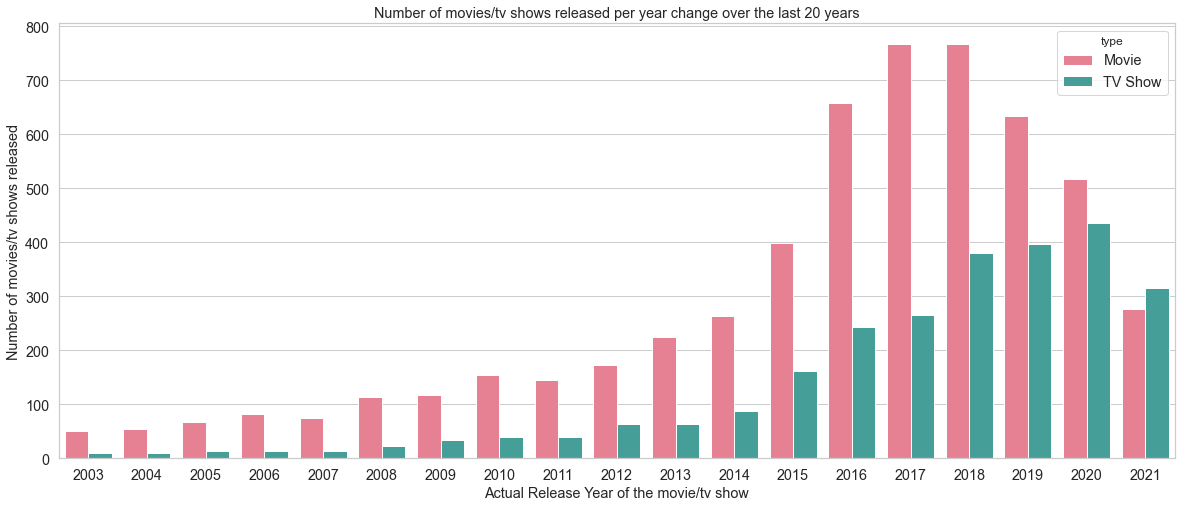

In [94]:
current_year = datetime.now().year
last_years = 20

year_mask = df['release_year'] >= (current_year - last_years) 
number_of_releases = df[year_mask][['release_year','type']]

plt.figure(figsize=(20, 8))
sns.countplot(data=number_of_releases, x='release_year', hue='type', palette='husl')

plt.title(f'Number of movies/tv shows released per year change over the last {last_years} years')
plt.xlabel('Actual Release Year of the movie/tv show')
plt.ylabel('Number of movies/tv shows released')
plt.show()

### Comparison of tv shows vs. movies.

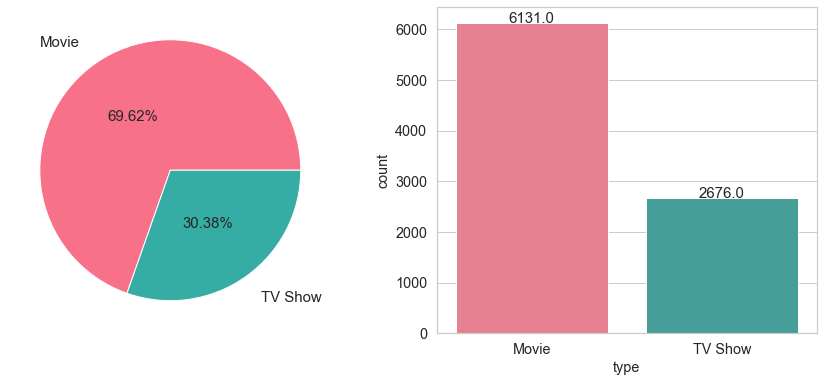

In [95]:
fig = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 6))

plt.subplot(1,2,1)
y = np.array(df.type.value_counts().values)
mylabels = df.type.value_counts().index
plt.pie(y, labels = mylabels, autopct='%1.2f%%', pctdistance = 0.5, labeldistance = 1.2,
        colors = [sns.color_palette('husl')[0], sns.color_palette('husl')[3]],
        textprops = {"fontsize":15})

plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='type', palette='husl')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, bar.get_height(),
            horizontalalignment='center', fontsize = 15)

plt.show()

### What is the best time to launch a TV show?

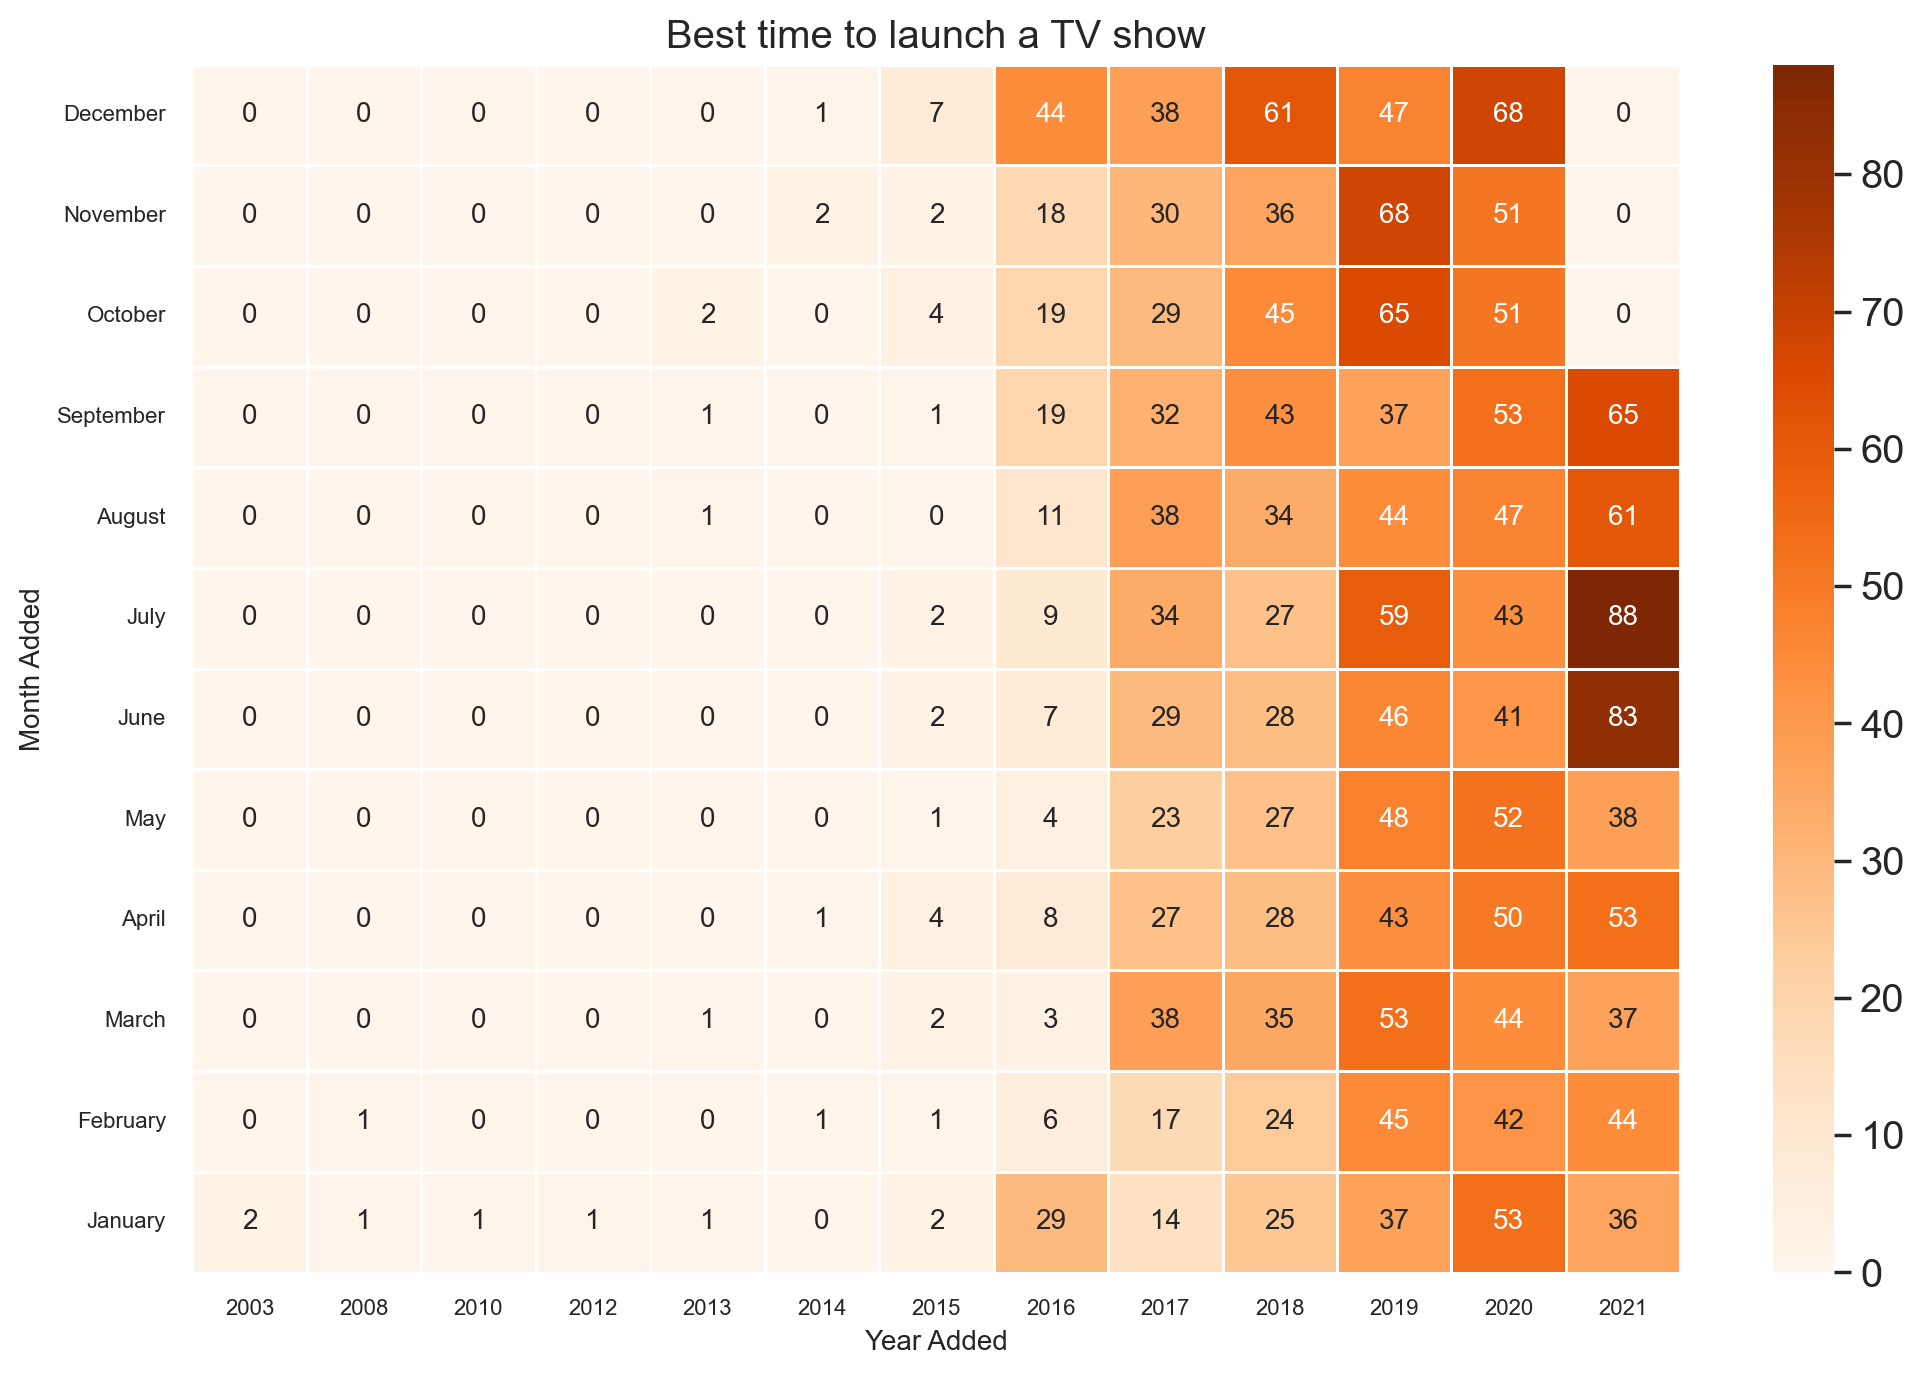

In [96]:
plt.figure(figsize=(12, 8), dpi=200)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December'][::-1]
heat_map_df = df_tv_show.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
sns.heatmap(data=heat_map_df, annot=True, cmap='Oranges', linewidths=1)

plt.title('Best time to launch a TV show')
plt.xticks(np.arange(0.5, len(heat_map_df.columns), 1), heat_map_df.columns, fontsize=8)
plt.yticks(np.arange(0.5, len(heat_map_df.index), 1), heat_map_df.index, fontsize=8)
plt.xlabel('Year Added', fontsize=10)
plt.ylabel('Month Added', fontsize=10)
plt.show()

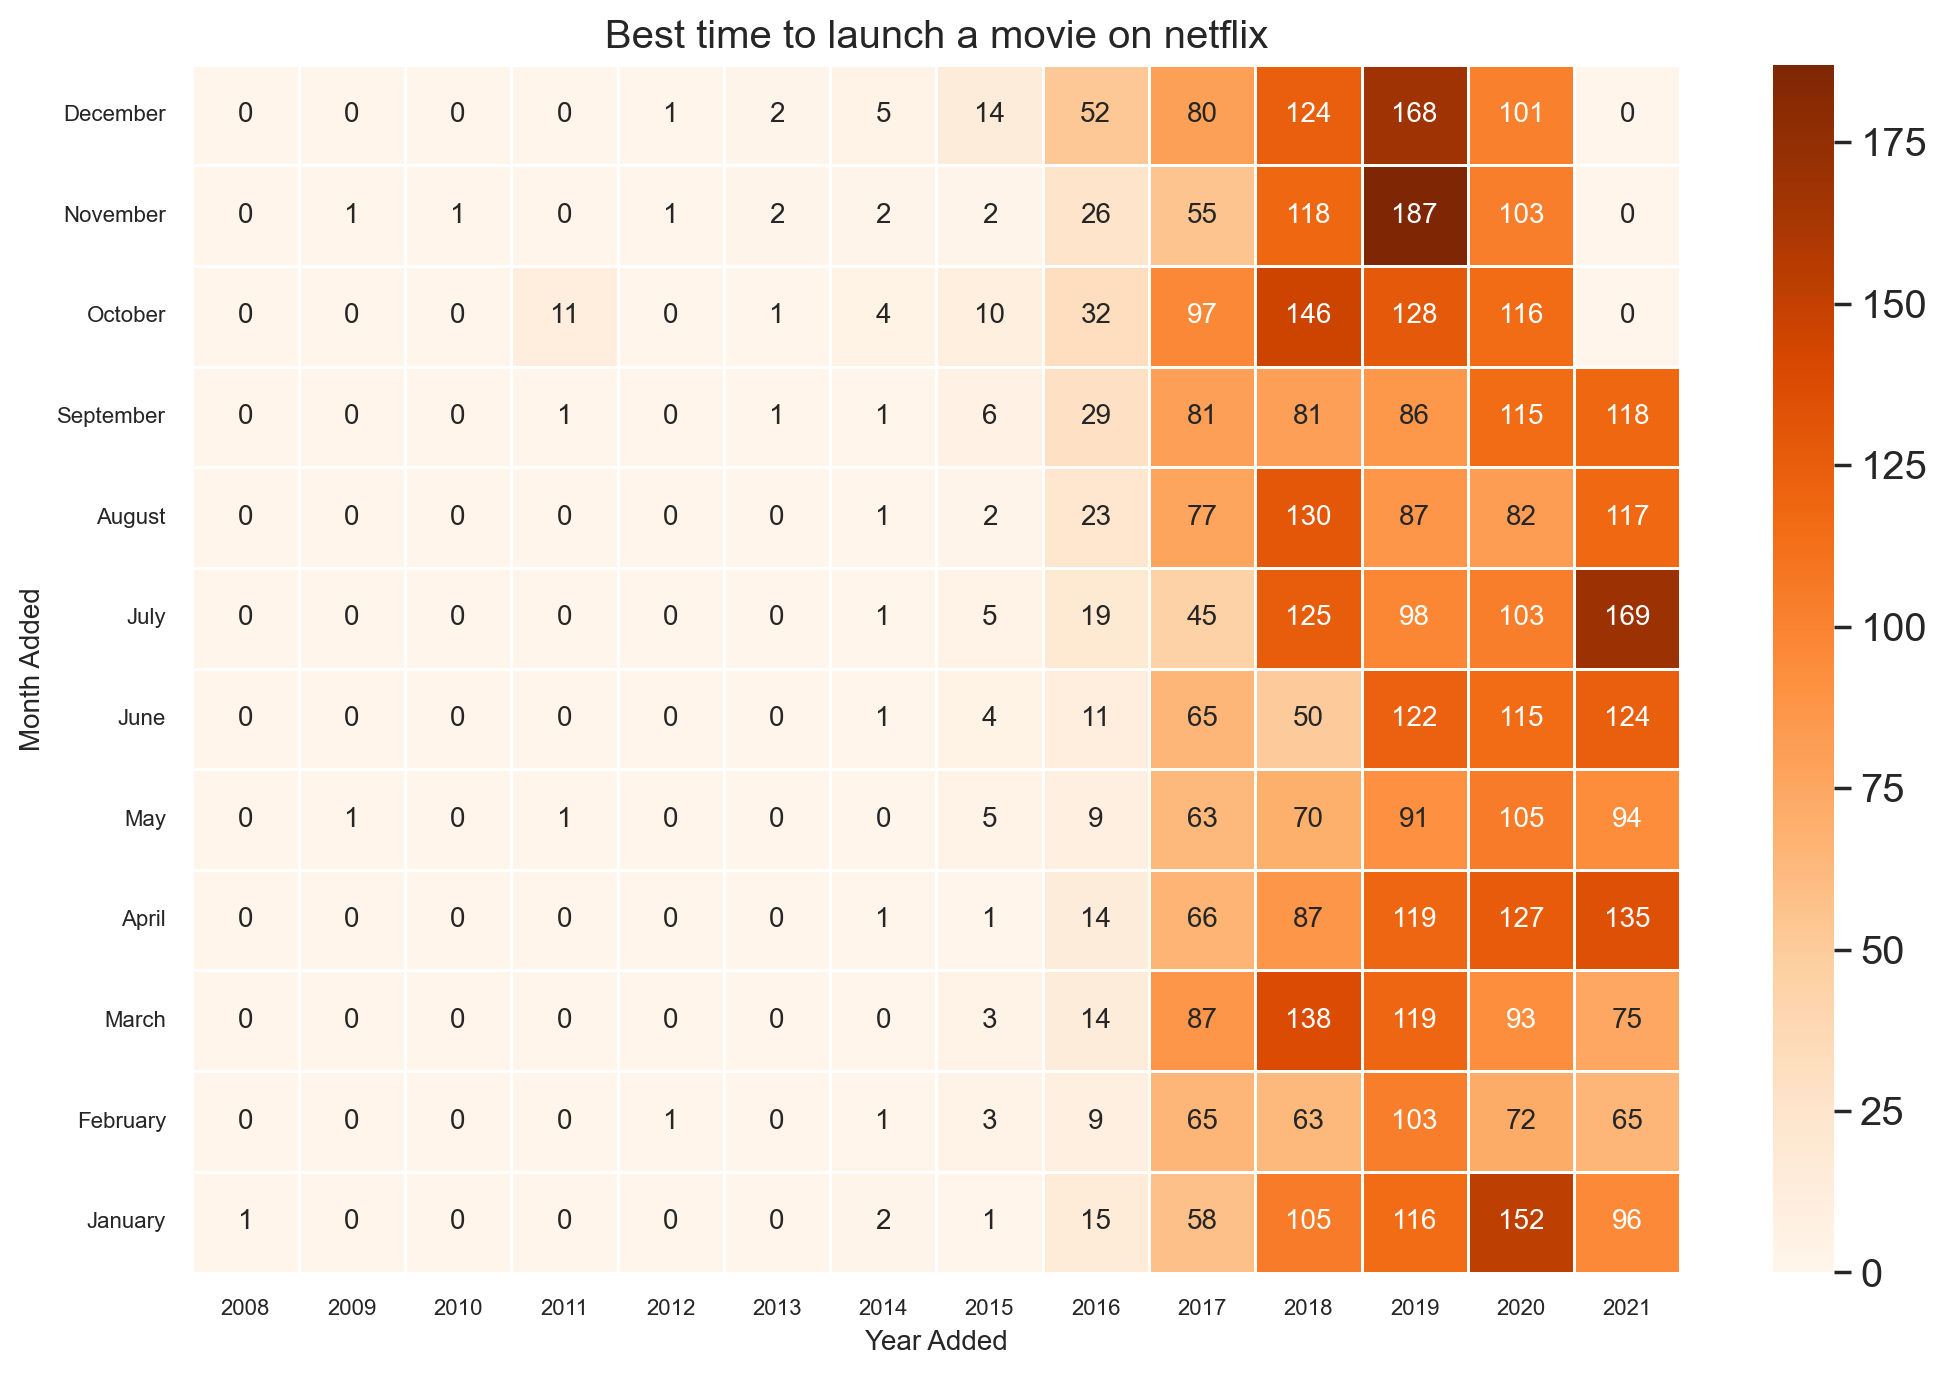

In [97]:
plt.figure(figsize=(12, 8), dpi=200)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December'][::-1]
heat_map_df = df_movie.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
sns.heatmap(data=heat_map_df, annot=True, cmap='Oranges', linewidths=1, fmt='.3g')

plt.title('Best time to launch a movie on netflix')
plt.xticks(np.arange(0.5, len(heat_map_df.columns), 1), heat_map_df.columns, fontsize=8)
plt.yticks(np.arange(0.5, len(heat_map_df.index), 1), heat_map_df.index, fontsize=8)
plt.xlabel('Year Added', fontsize=10)
plt.ylabel('Month Added', fontsize=10)
plt.show()

### Analysis of actors/directors of different types of shows/movies

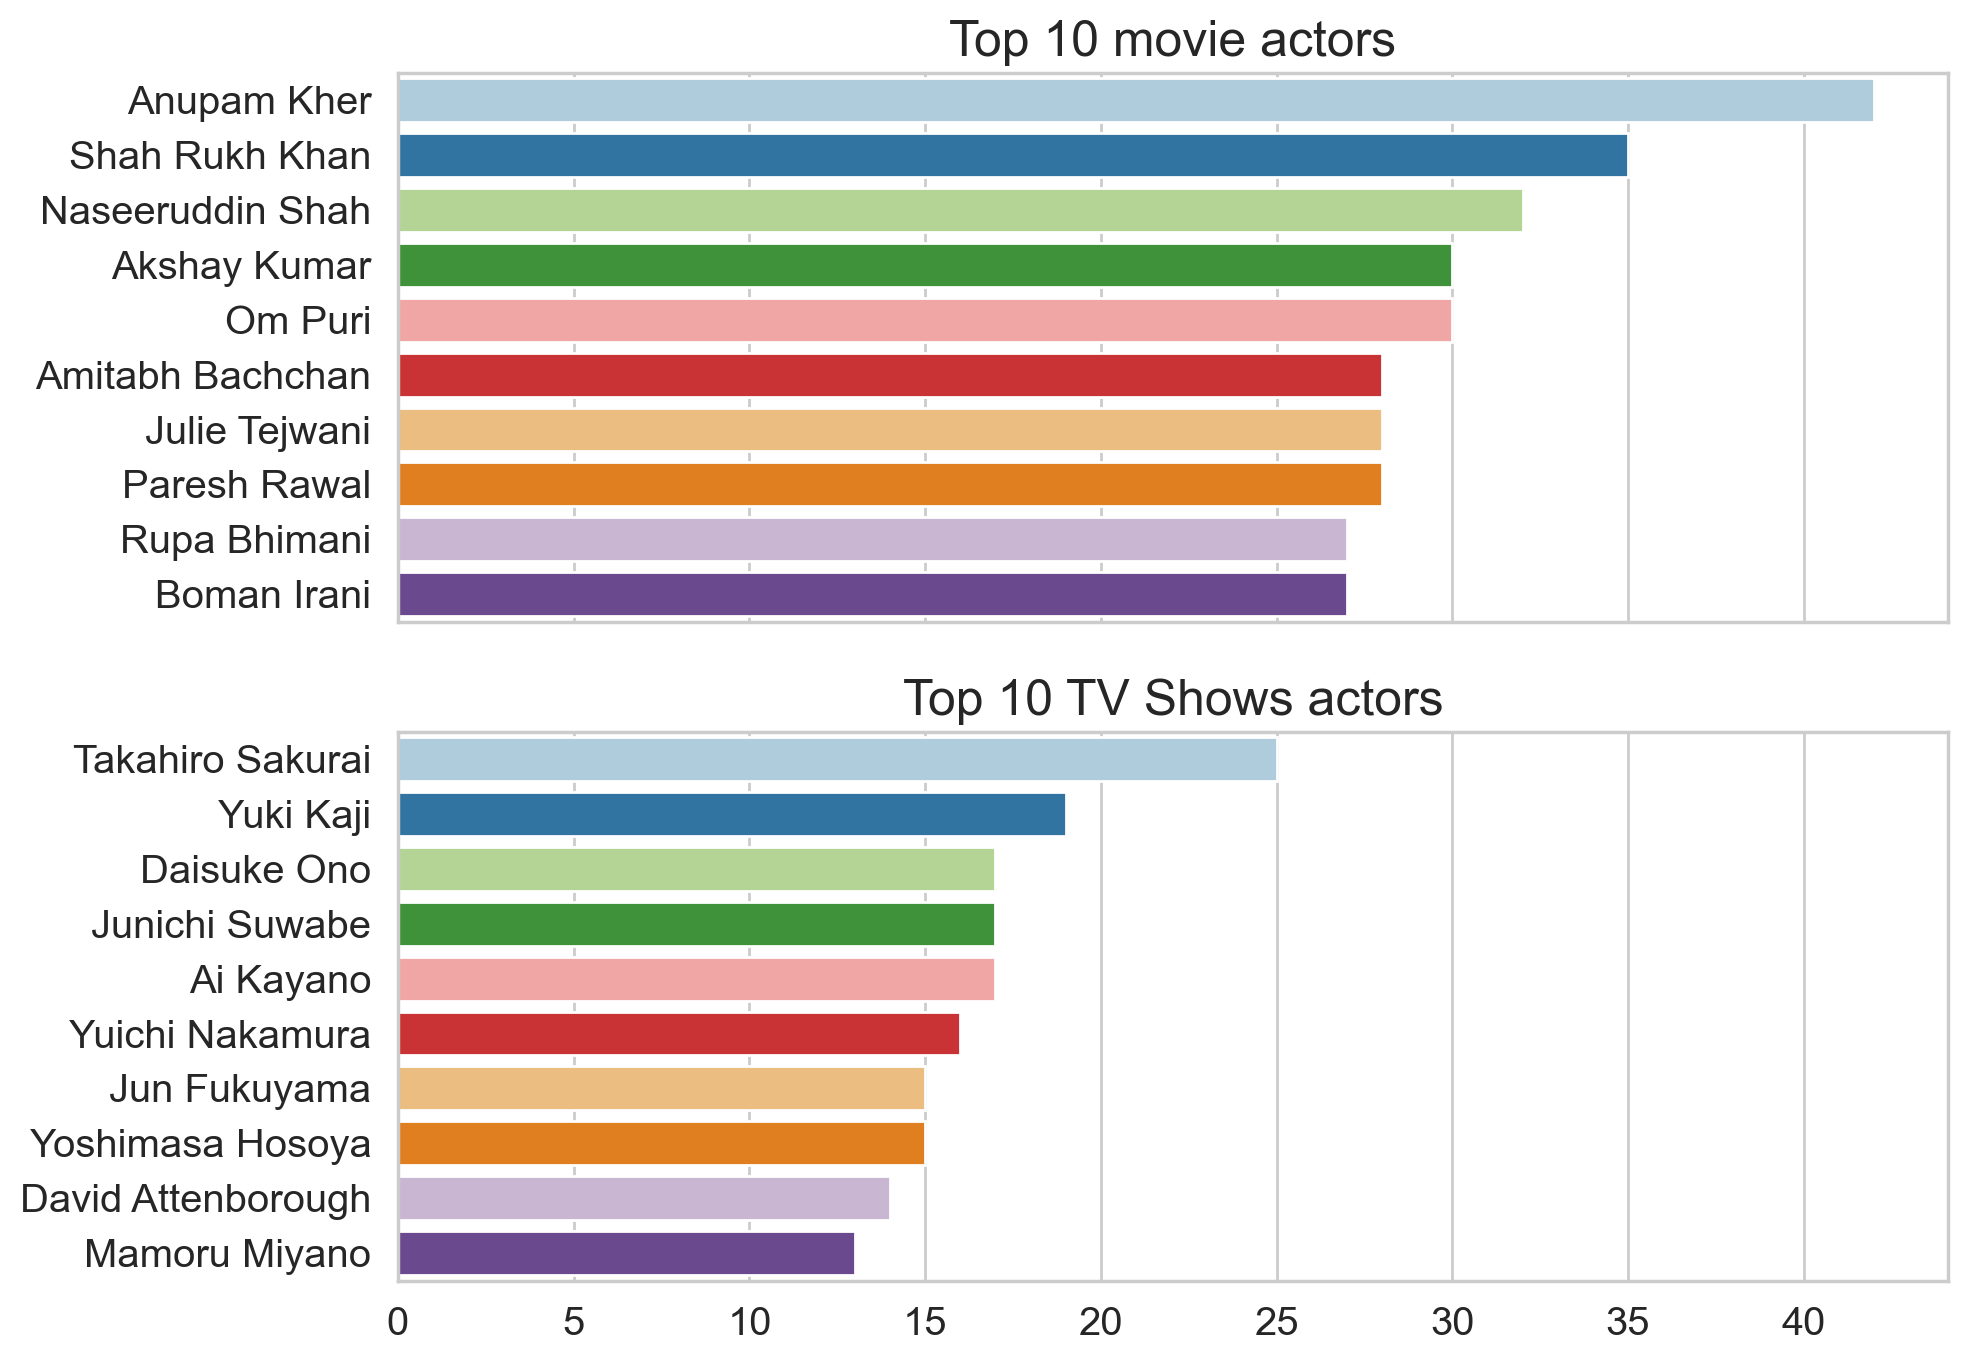

In [98]:
df_movie_actor = pd.merge(df_movie, df_cast, how='inner')
top_10_movie_actor = df_movie_actor['cast'].value_counts()[:10]

df_tv_show_actor = pd.merge(df_tv_show, df_cast, how='inner')
top_10_tv_show_actor = df_tv_show_actor['cast'].value_counts()[:10]

fig = plt.figure(figsize = (10, 8), dpi=200)

fig1 = fig.add_subplot(2,1,1)
sns.barplot(x=top_10_movie_actor.values, y=top_10_movie_actor.index, palette='Paired')
plt.title('Top 10 movie actors', fontsize=18)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('')

plt.subplot(2,1,2, sharex=fig1)
sns.barplot(x=top_10_tv_show_actor.values, y=top_10_tv_show_actor.index, palette='Paired')
plt.title('Top 10 TV Shows actors', fontsize=18)
plt.ylabel('')
plt.show()

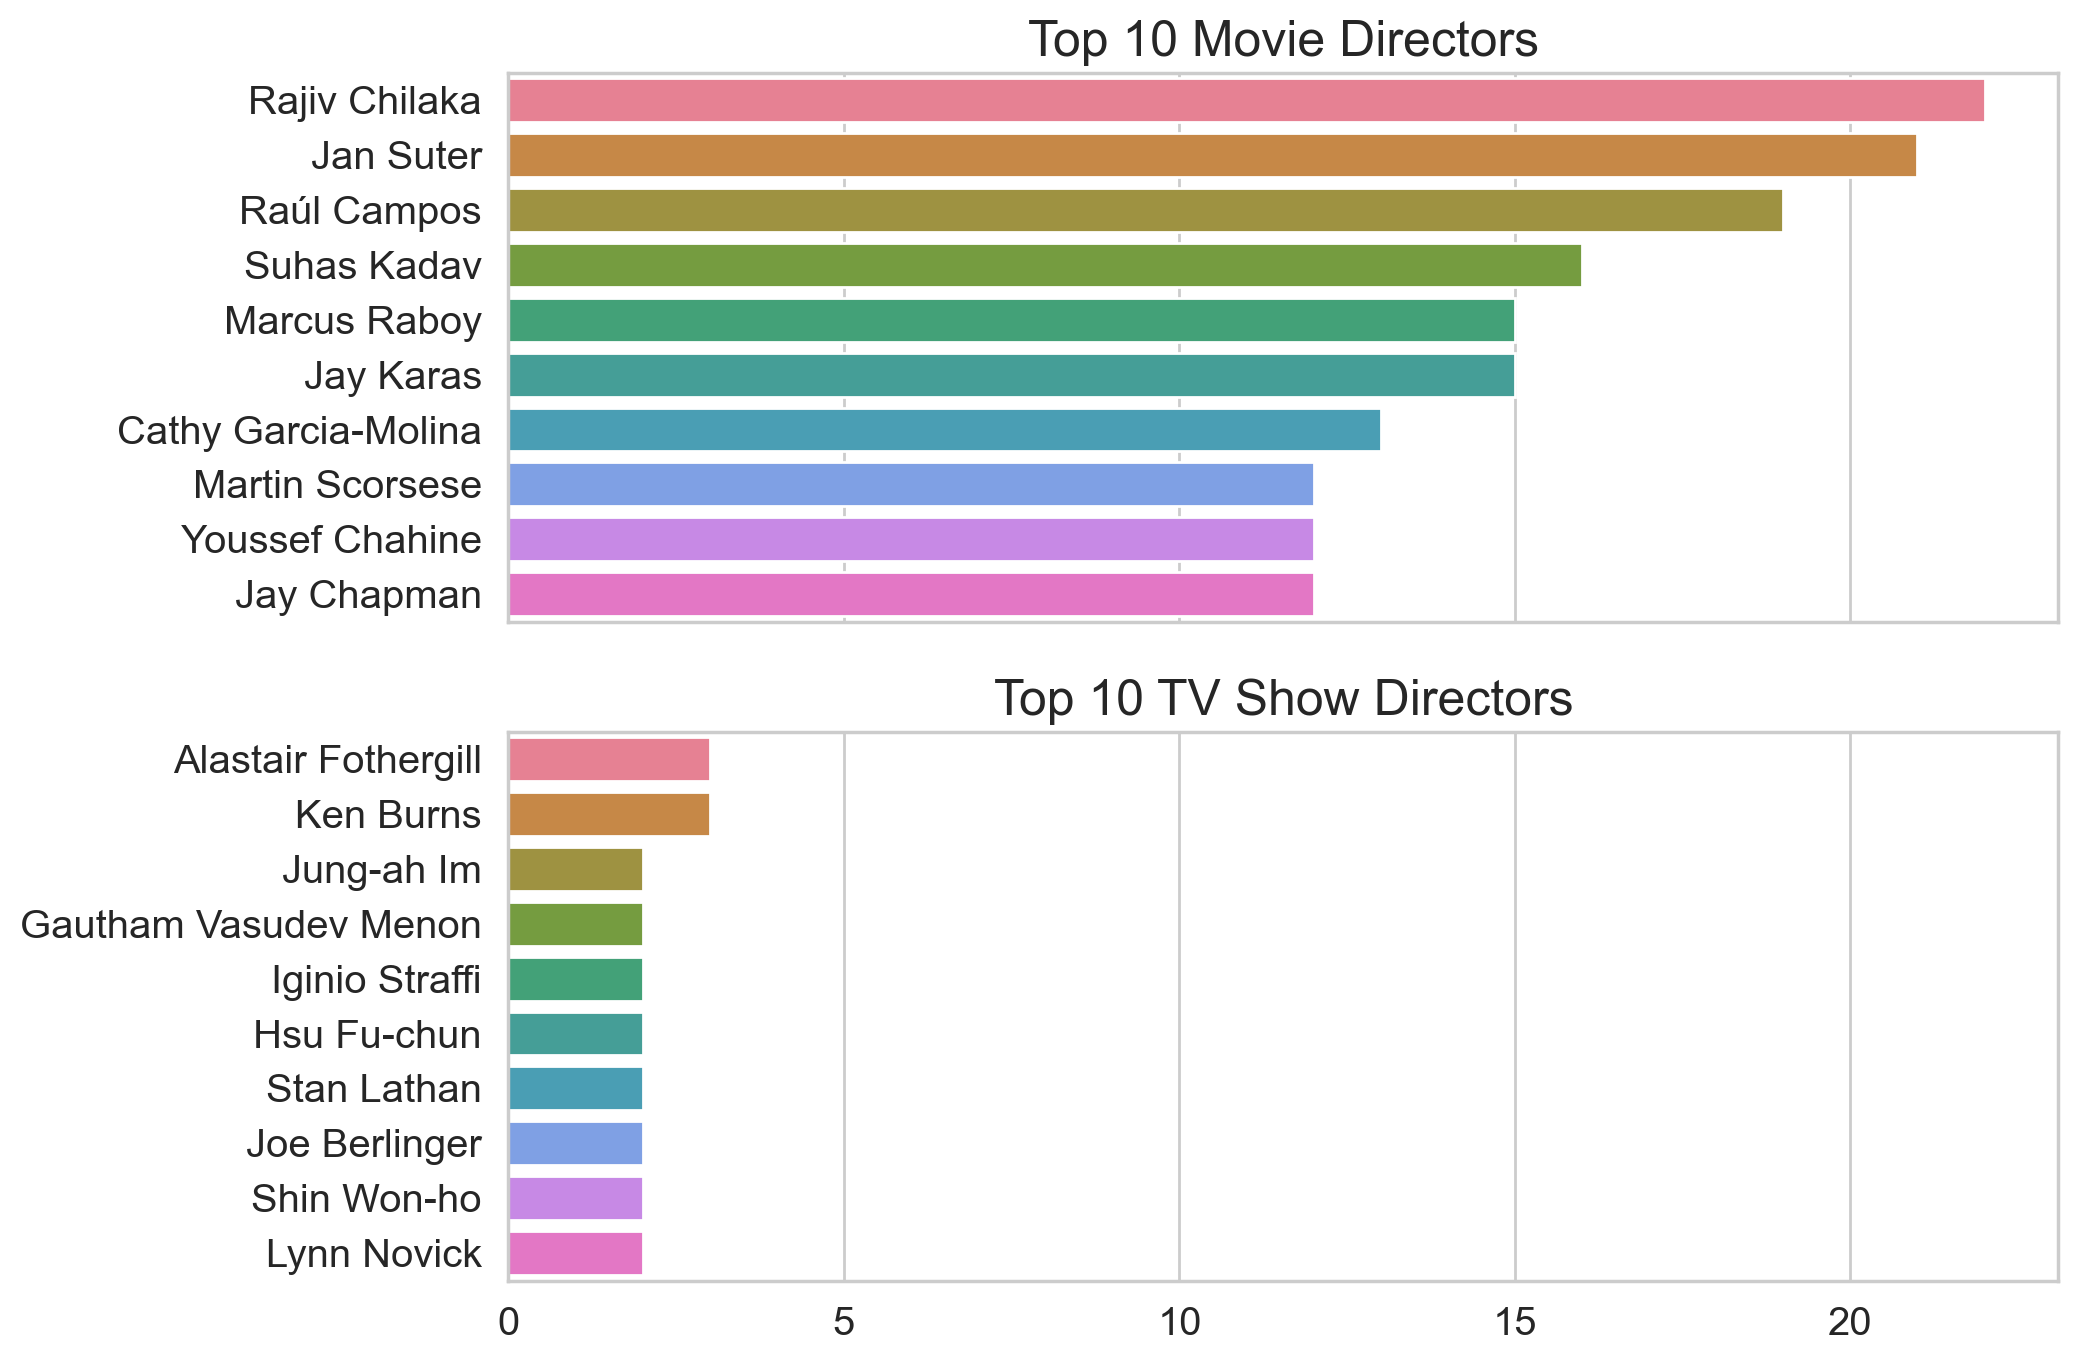

In [99]:
df_movie_director = pd.merge(df_movie, df_director, how='inner')
top_10_movie_director = df_movie_director['director'].value_counts()[:10]

df_tv_show_director = pd.merge(df_tv_show, df_director, how='inner')
top_10_tv_show_director = df_tv_show_director['director'].value_counts()[:10]

fig = plt.figure(figsize = (10, 8), dpi=200)

fig1 = fig.add_subplot(2,1,1)
sns.barplot(x=top_10_movie_director.values, y=top_10_movie_director.index, palette='husl')
plt.title('Top 10 Movie Directors', fontsize=18)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('')

plt.subplot(2,1,2, sharex=fig1)
sns.barplot(x=top_10_tv_show_director.values, y=top_10_tv_show_director.index, palette='husl')
plt.title('Top 10 TV Show Directors', fontsize=18)
plt.ylabel('')

plt.show()

###  Distribution of Movie/TV Show Ratings

In [100]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

def ratings_distribution(rating, show_type):
    fig, ax = plt.subplots(1,1, figsize=(20, 10), dpi=200)
    ax.bar(rating.index, rating.values, color="black", width=0.6, edgecolor='black')

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, bar.get_height(),
                horizontalalignment='center', fontsize = 18)

    color = sns.color_palette('husl')[:4] 
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Kids', 'Older Kids', 'Teens', 'Adults']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,2000),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=20, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4, span_range[idx][1]+0.4, color=color[idx], alpha=0.4)

    ax.set_title(f'Distribution of {show_type} Ratings', fontsize=20)
    plt.ylabel(f'Number of {show_type}s', fontsize=20)
    plt.show()

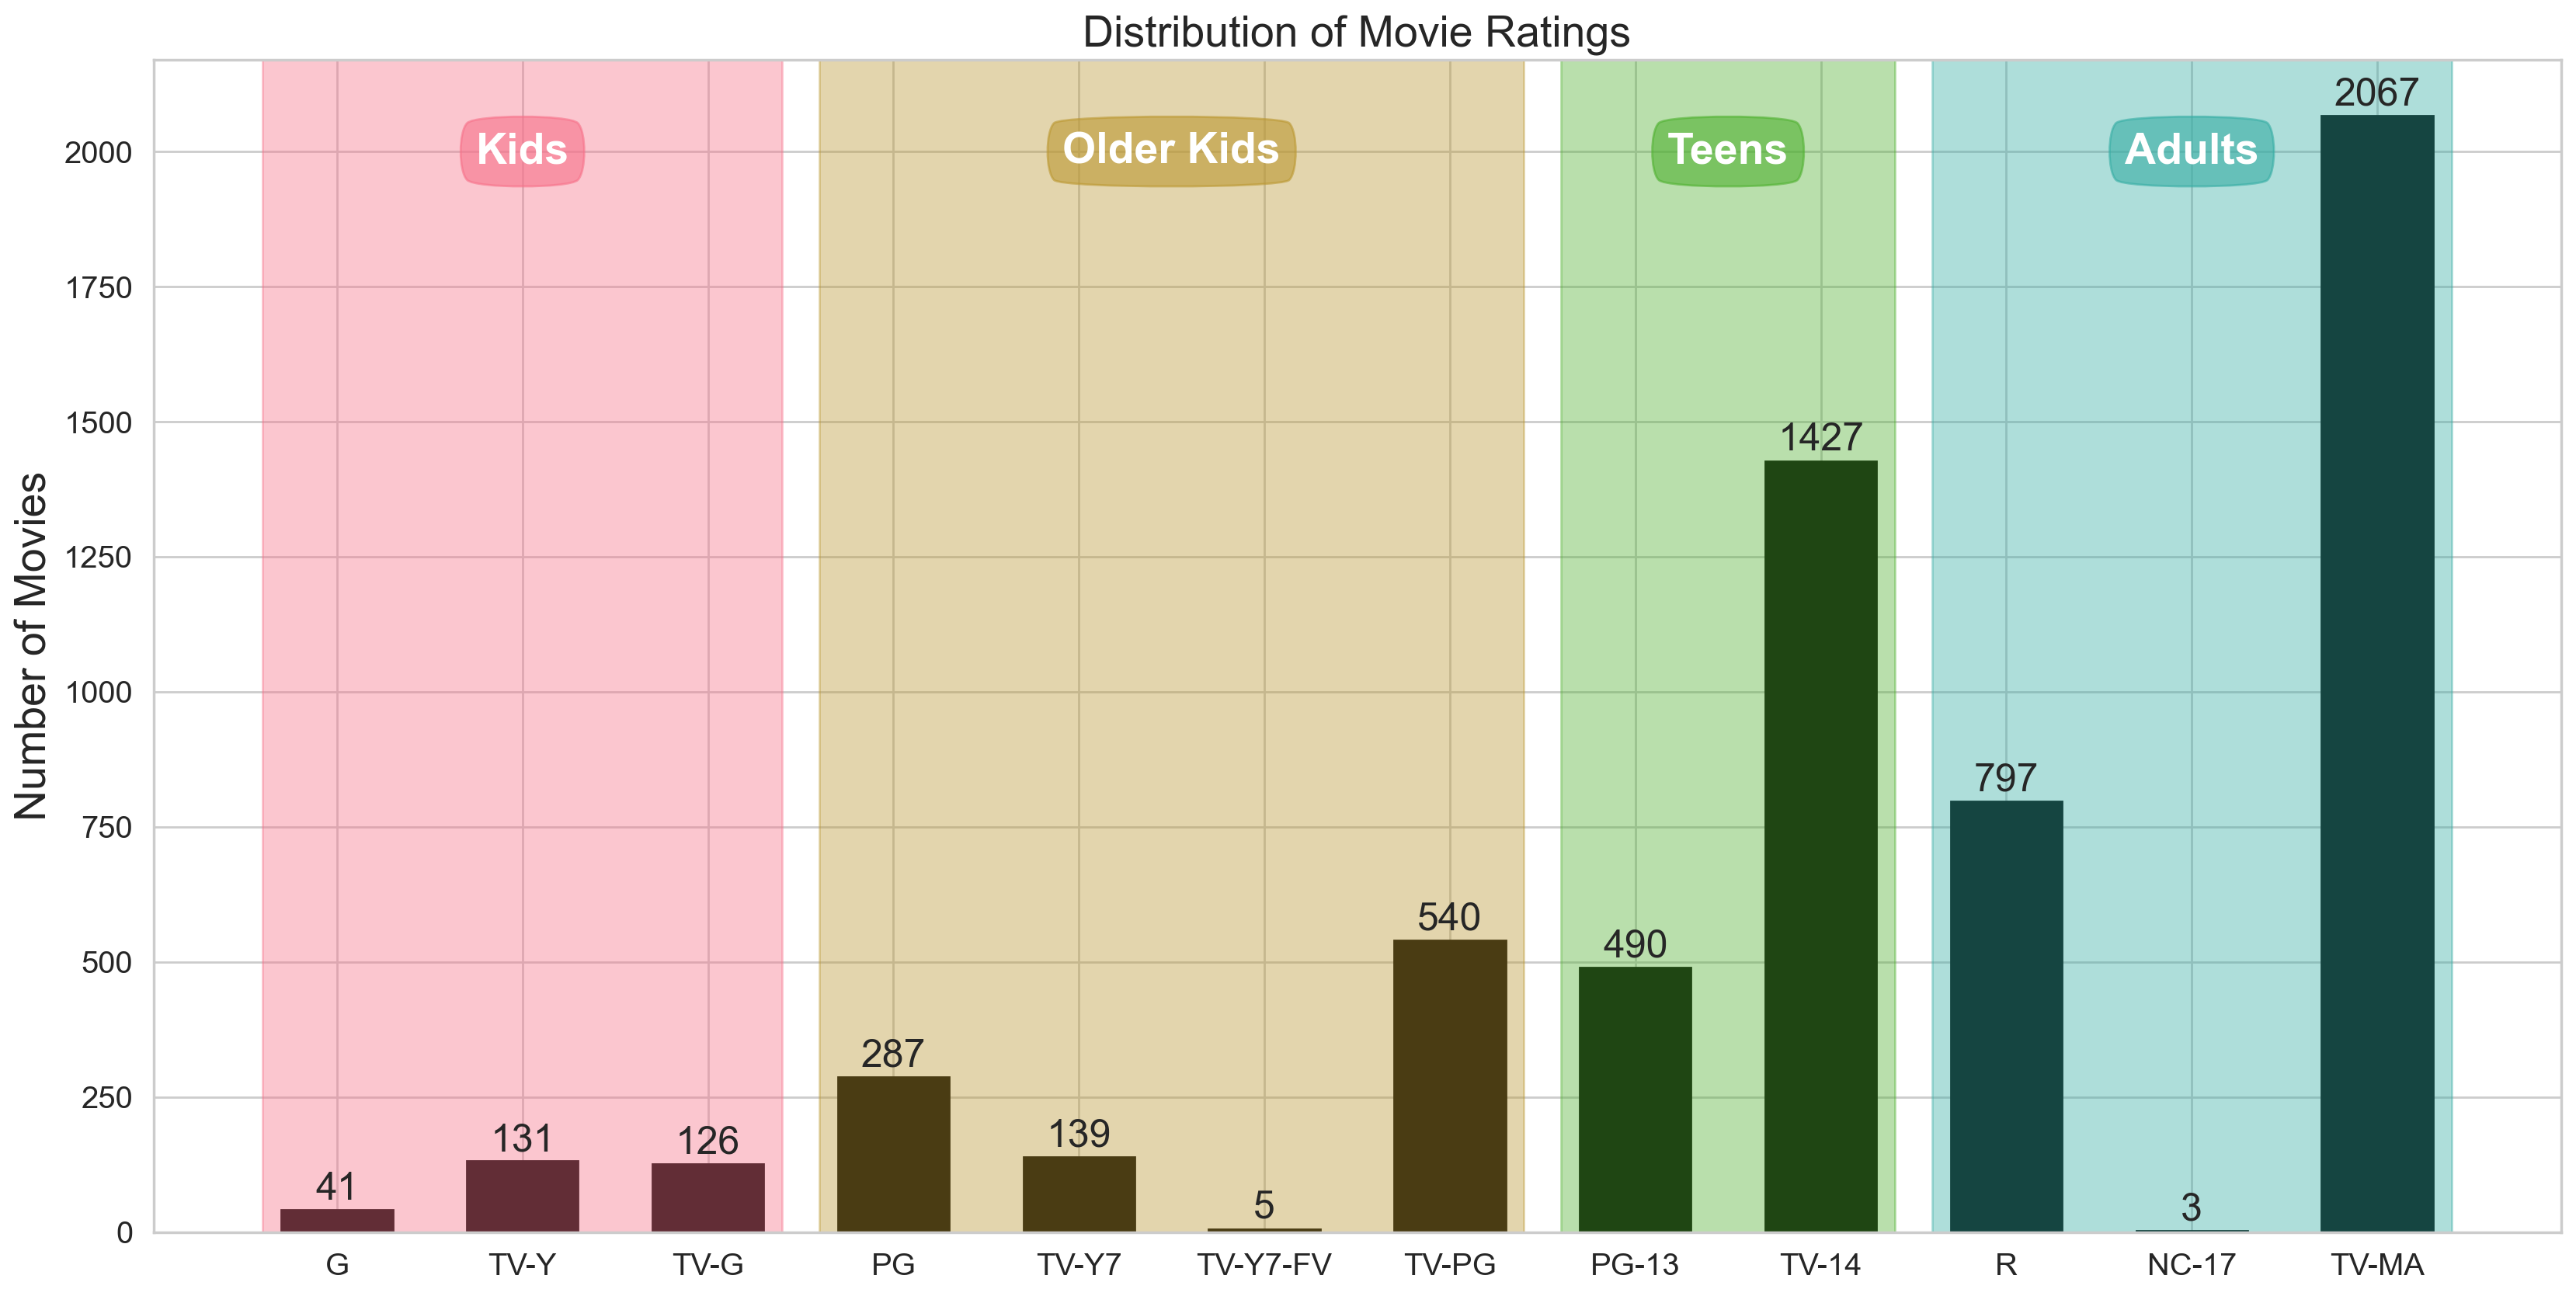

In [101]:
ratings_distribution(df_movie['rating'].value_counts()[rating_order], 'Movie')

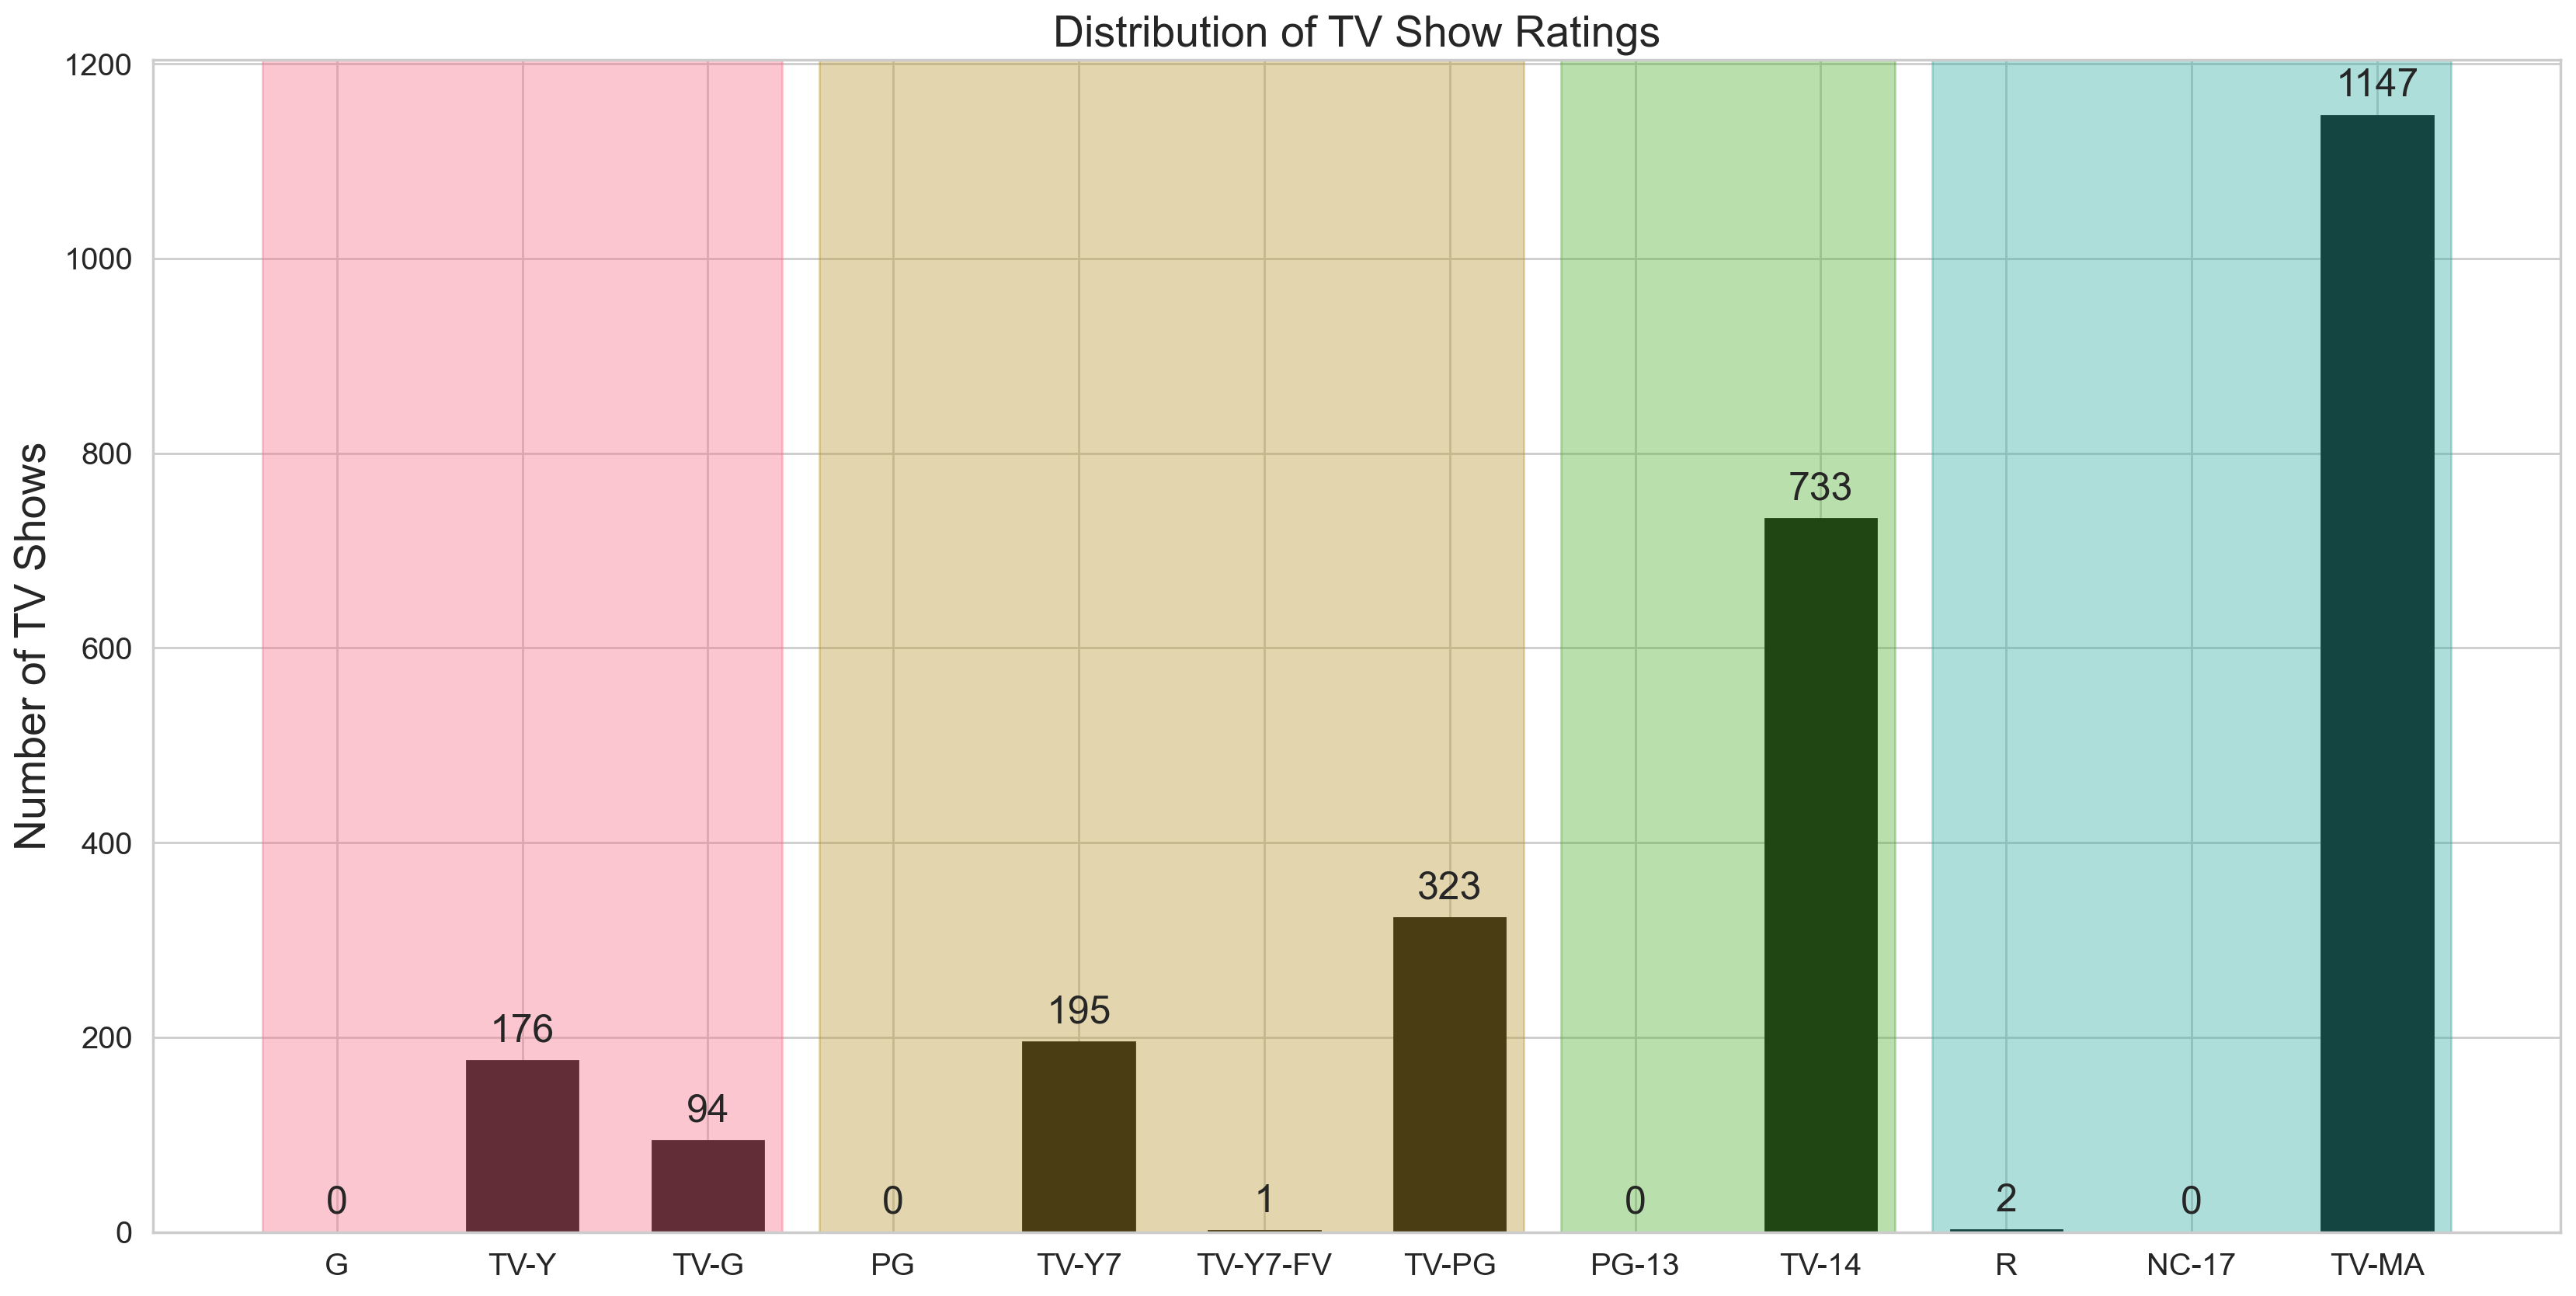

In [102]:
rating_tv_show = df_tv_show['rating'].value_counts()

not_in_tv = ['G', 'PG', 'PG-13', 'NC-17']
for rating in not_in_tv:
    rating_tv_show[rating] = 0
    
ratings_distribution(rating_tv_show[rating_order], 'TV Show')

### Does Netflix has more focus on TV Shows than movies in recent years

In [1]:
plt.figure(figsize=(18,8), dpi=200)

recent_years = 15
tv_show_release = df_tv_show.groupby('release_year')['show_id'].count().sort_index(ascending=False)[:recent_years]
movie_release = df_movie.groupby('release_year')['show_id'].count().sort_index(ascending=False)[:recent_years]

plt.plot(movie_release, color='blue',linewidth=4)
plt.bar(movie_release.index, movie_release.values, color='#6e6e6e', width=0.4)

plt.plot(tv_show_release, color='red', linewidth=4)
plt.bar(tv_show_release.index, tv_show_release.values, color='#d0d0d0', width=0.2)

plt.xticks(movie_release.index)
plt.xlabel("Year")
plt.ylabel("Number of titles added")
plt.title("Movies vs. TV Shows on Netflix", fontsize=20)
plt.legend(['Movies','TV Shows'])
plt.show()

NameError: name 'plt' is not defined

### Understanding what content is available in different countries

In [127]:
df_country_viz = pd.merge(df, df_country, how='inner')
df_country_map_viz = df_country_viz.groupby(['year_added','country']).agg({'show_id': 'count'}).reset_index()
df_country_map_viz.rename(columns={'show_id': 'Total releases'}, inplace = True)

fig = px.choropleth(df_country_map_viz, locations="country", color="Total releases", 
        locationmode='country names', animation_frame='year_added',
        range_color=[0, df_country_map_viz['Total releases'].max()],
        color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title = 'Cumulative sum of content over the year by country')
fig.show()

### Understanding when content was released and actually added on netflix

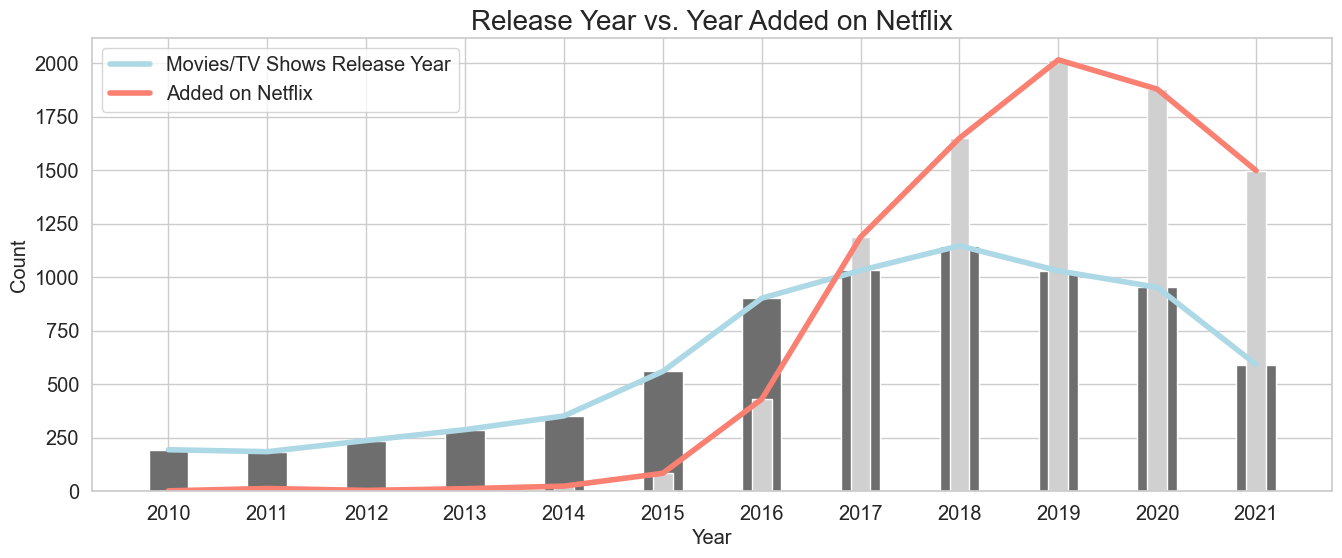

In [106]:
last_years = 12

release_year_data = df['release_year'].value_counts().sort_index(ascending=False)[:last_years]
year_added_data = df['year_added'].value_counts().sort_index(ascending=False)[:last_years]

plt.figure(figsize = (16, 6), dpi=100)

plt.plot(release_year_data, color='lightblue',linewidth=4)
plt.bar(release_year_data.index, release_year_data, color='#6e6e6e', width=0.4)

plt.plot(year_added_data, color='salmon',linewidth=4)
plt.bar(year_added_data.index, year_added_data, color='#d0d0d0', width=0.2)

plt.xticks(release_year_data.index)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Release Year vs. Year Added on Netflix", fontsize=20)
plt.legend(['Movies/TV Shows Release Year', 'Added on Netflix'])
plt.show()

### Understanding target-age-group's impact on movie duration

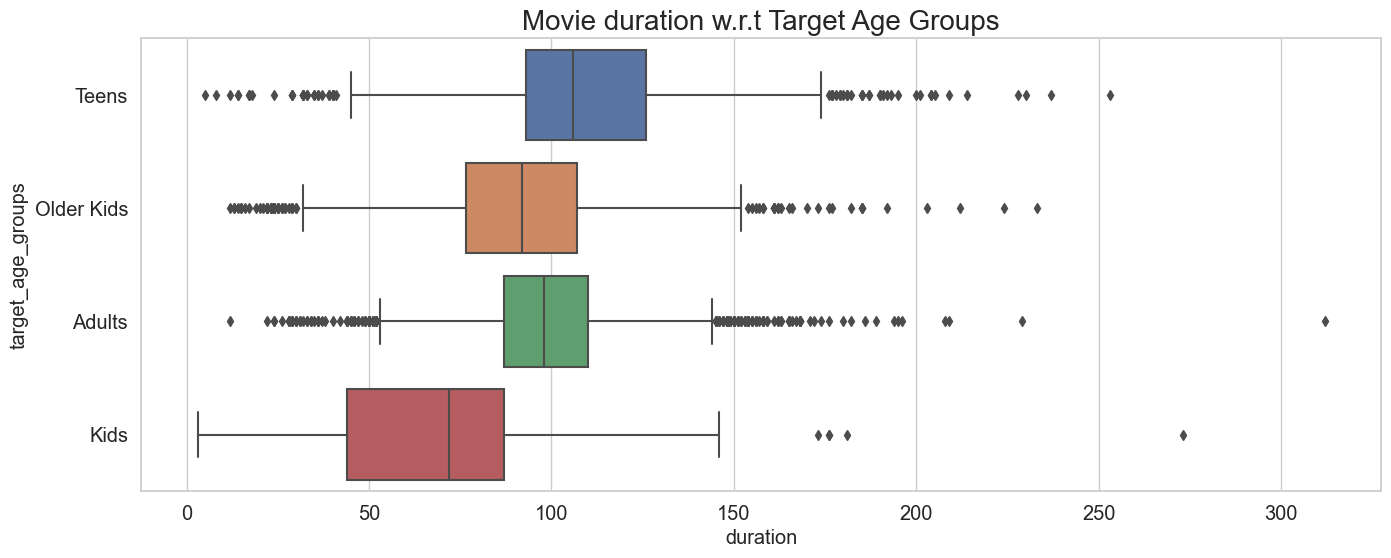

In [107]:
plt.figure(figsize = (16, 6), dpi=100)
sns.boxplot(data=df_movie, x='duration', y='target_age_groups')
plt.title('Movie duration w.r.t Target Age Groups', fontsize=20)
plt.show()

### Understanding rating's impact on movie duration

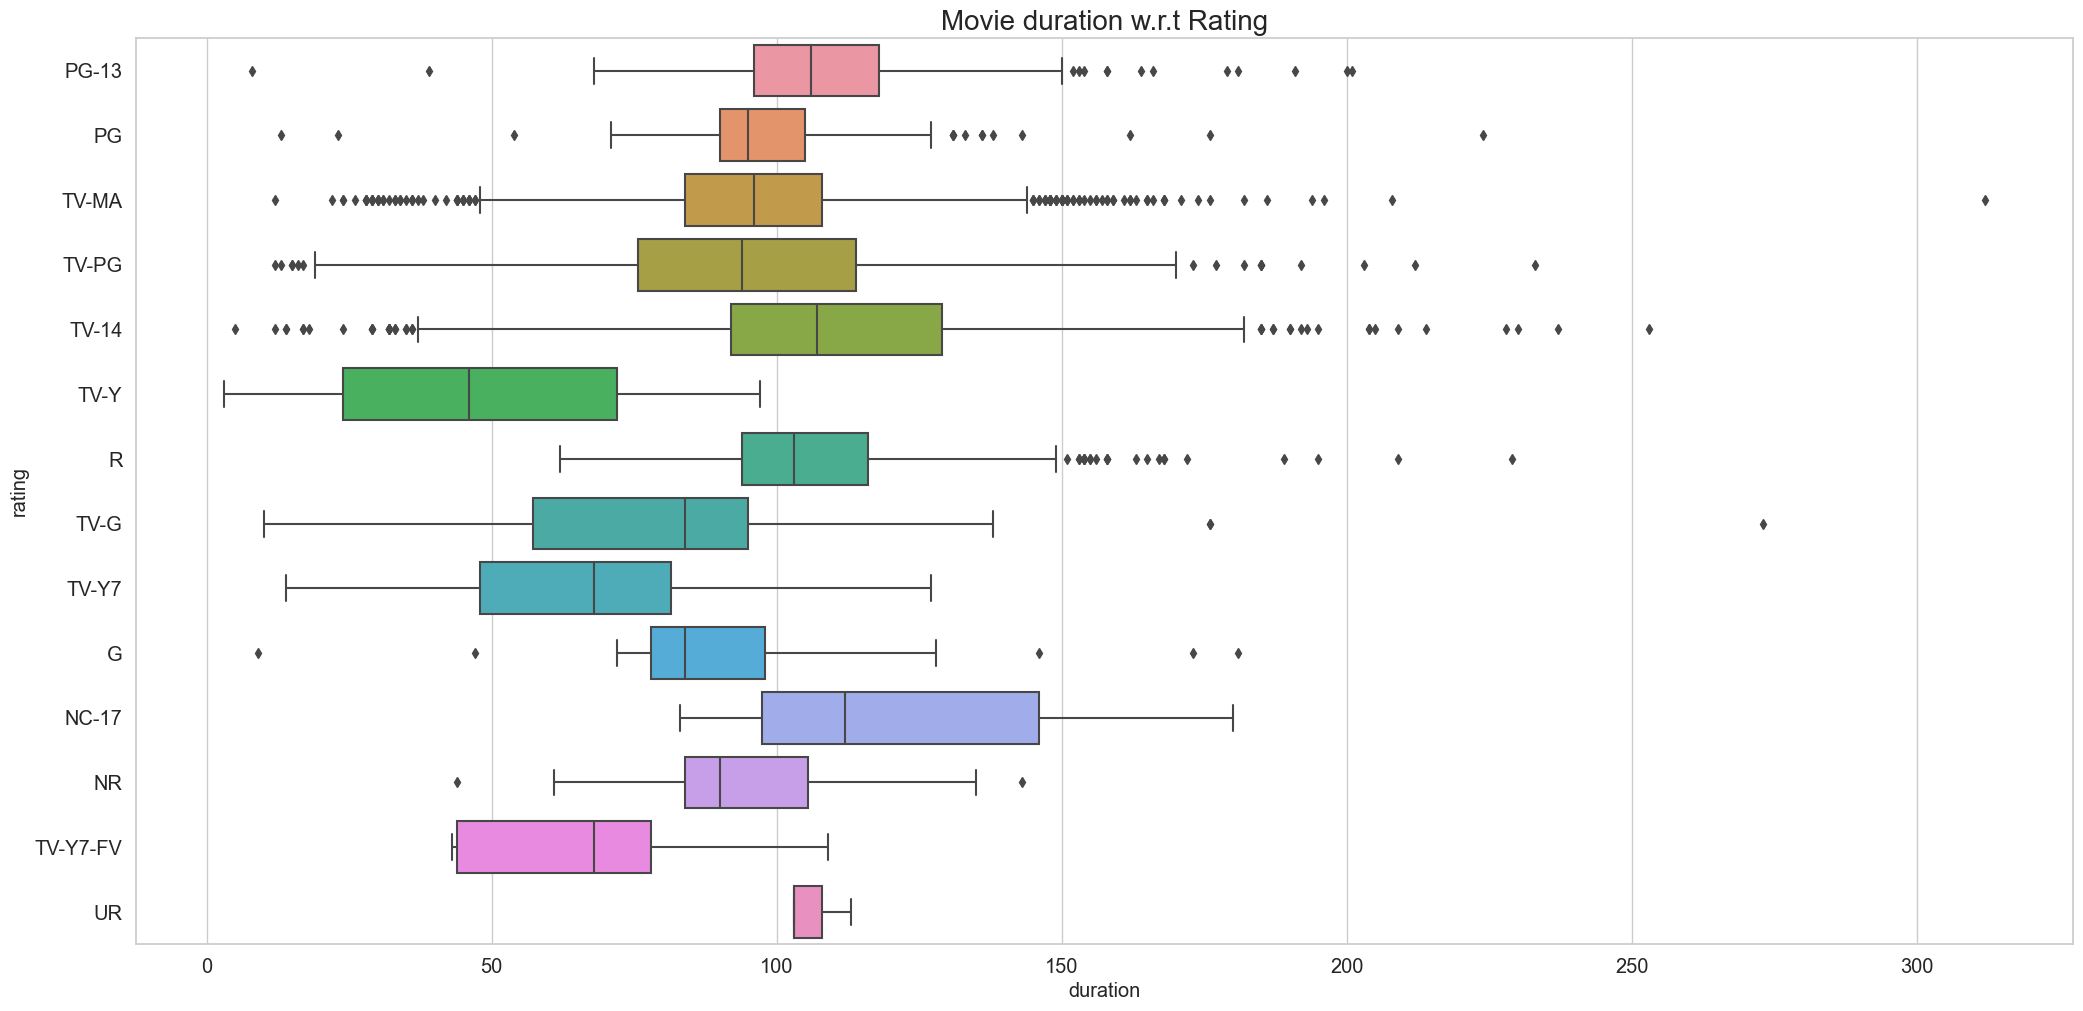

In [108]:
plt.figure(figsize = (25, 12), dpi=100)
sns.boxplot(data=df_movie, x='duration', y='rating')
plt.title('Movie duration w.r.t Rating', fontsize=20)
plt.show()

### Understanding target-age-group's impact on TV shows duration

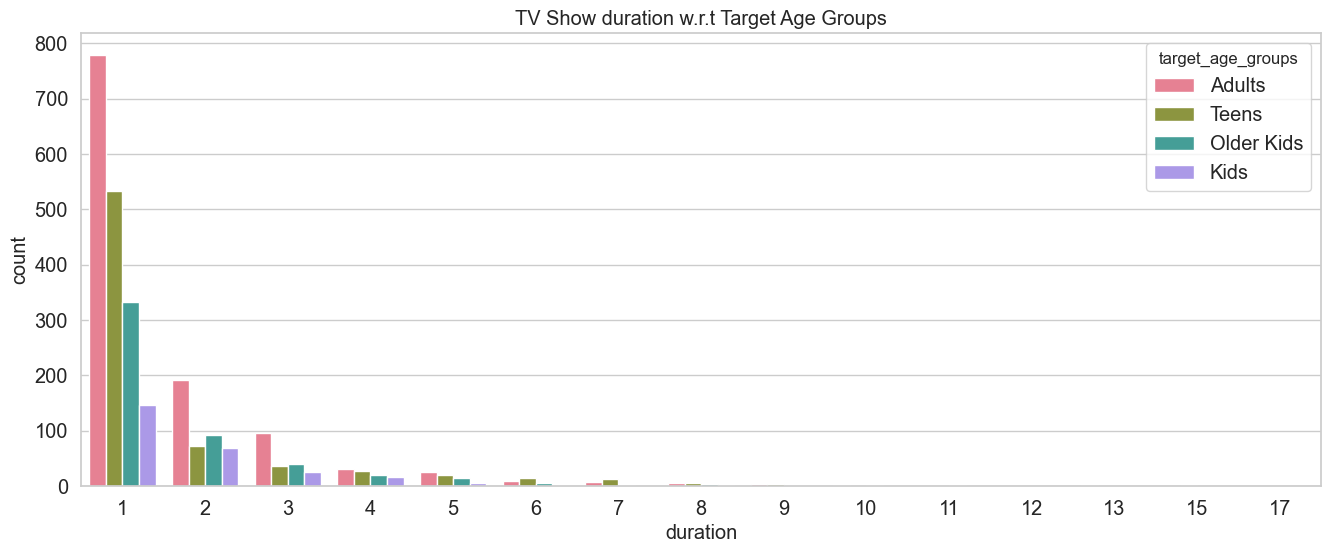

In [109]:
plt.figure(figsize = (16, 6), dpi=100)
sns.countplot(data=df_tv_show, x='duration', hue='target_age_groups', palette='husl')
plt.title('TV Show duration w.r.t Target Age Groups')
plt.show()

### Checking number of movies per genre

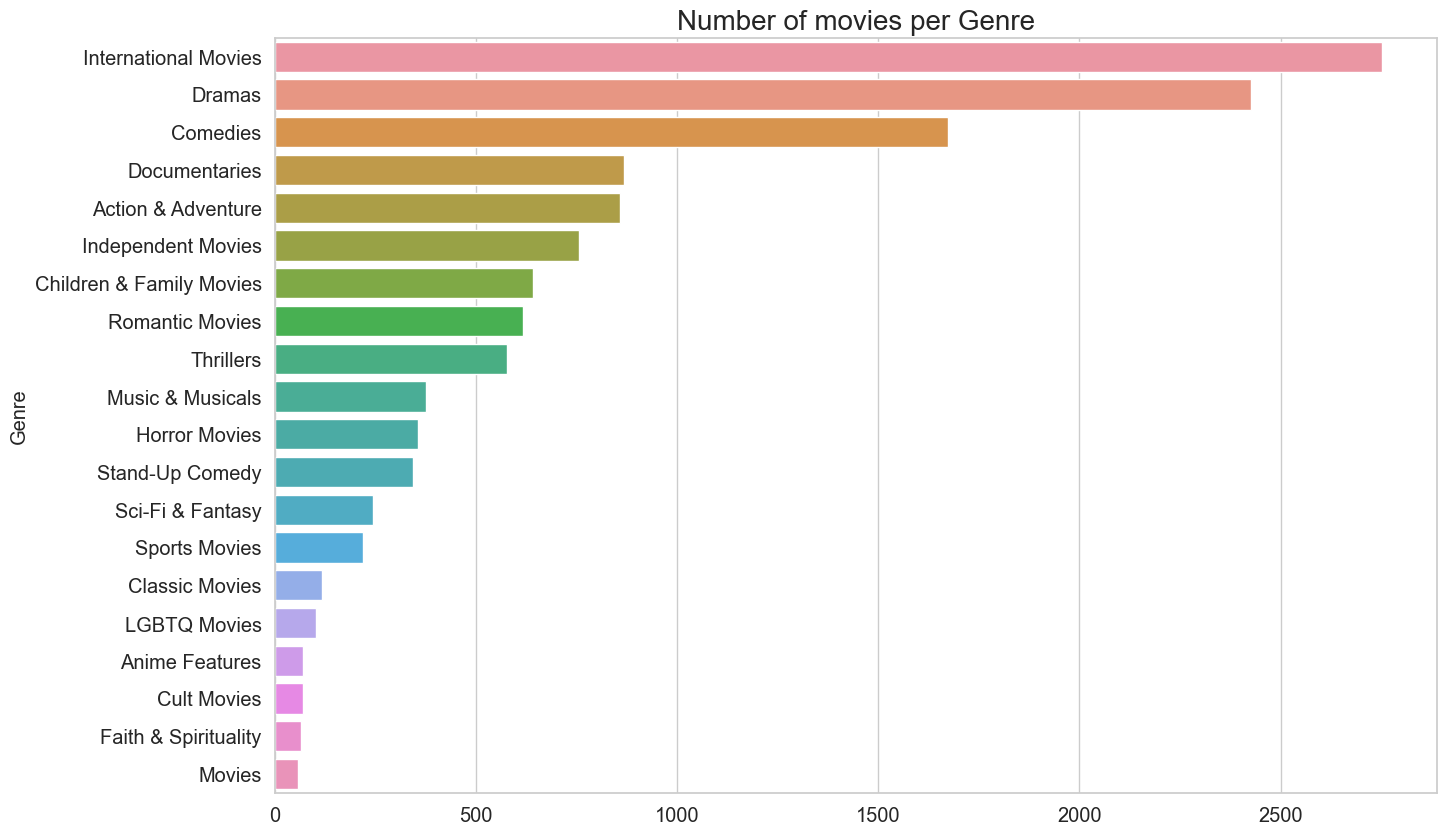

In [110]:
df_movie_genre = pd.merge(df_movie, df_listed_in, how='inner')

plt.figure(figsize = (15, 10), dpi=100)
sns.barplot(y=df_movie_genre['listed_in'].value_counts().index, x=df_movie_genre['listed_in'].value_counts().values)
plt.ylabel('Genre')
plt.title('Number of movies per Genre', fontsize=20)
plt.show()

### Checking number of TV shows per genre

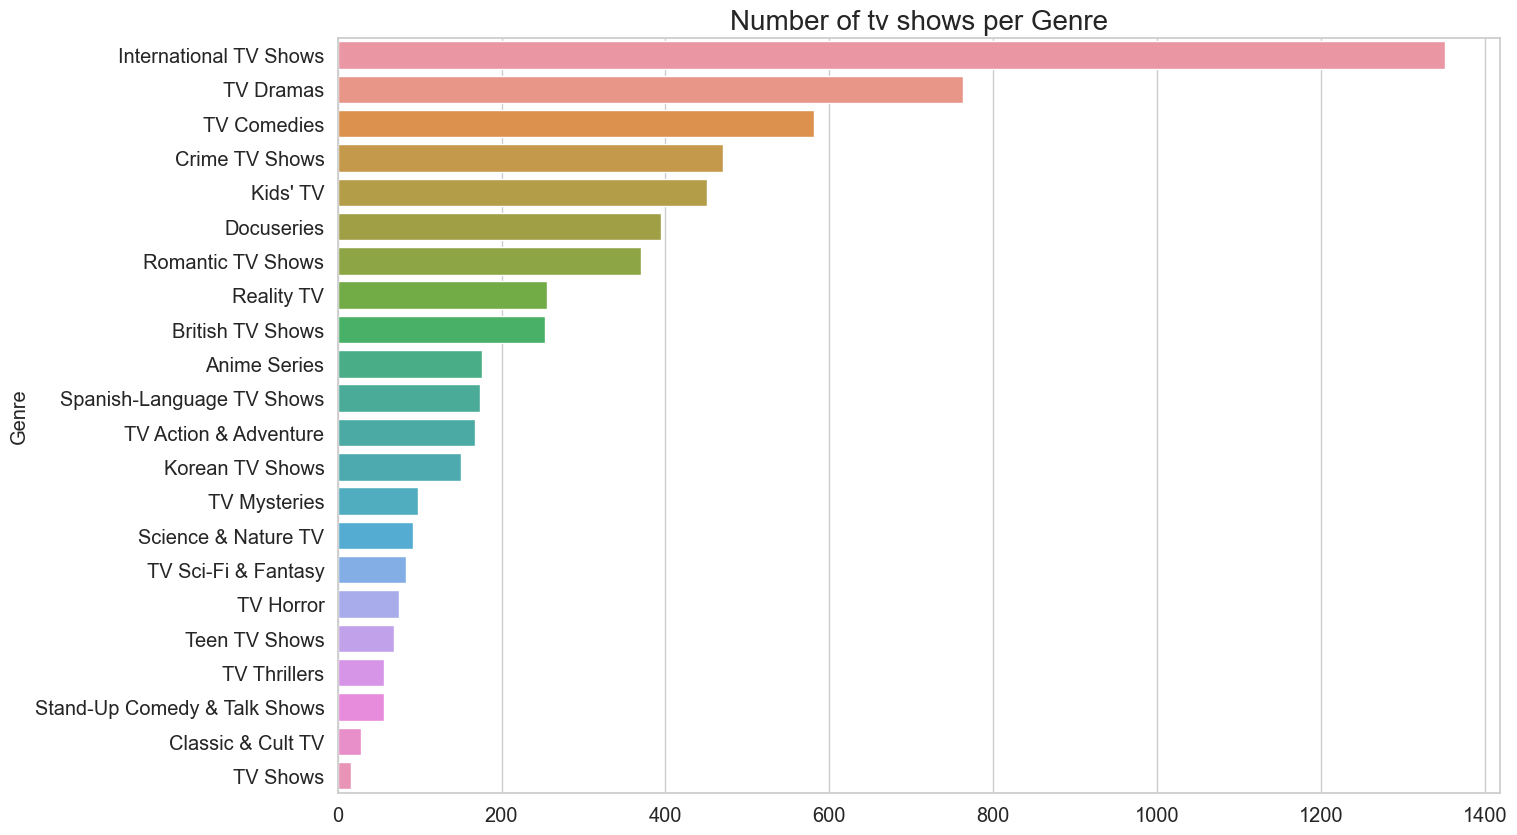

In [111]:
df_tv_show_genre = pd.merge(df_tv_show, df_listed_in, how='inner')

plt.figure(figsize = (15, 10), dpi=100)
sns.barplot(y=df_tv_show_genre['listed_in'].value_counts().index,
                x=df_tv_show_genre['listed_in'].value_counts().values)
plt.ylabel('Genre')
plt.title('Number of tv shows per Genre', fontsize=20)
plt.show()

### Top 10 seasons with most number of seasons

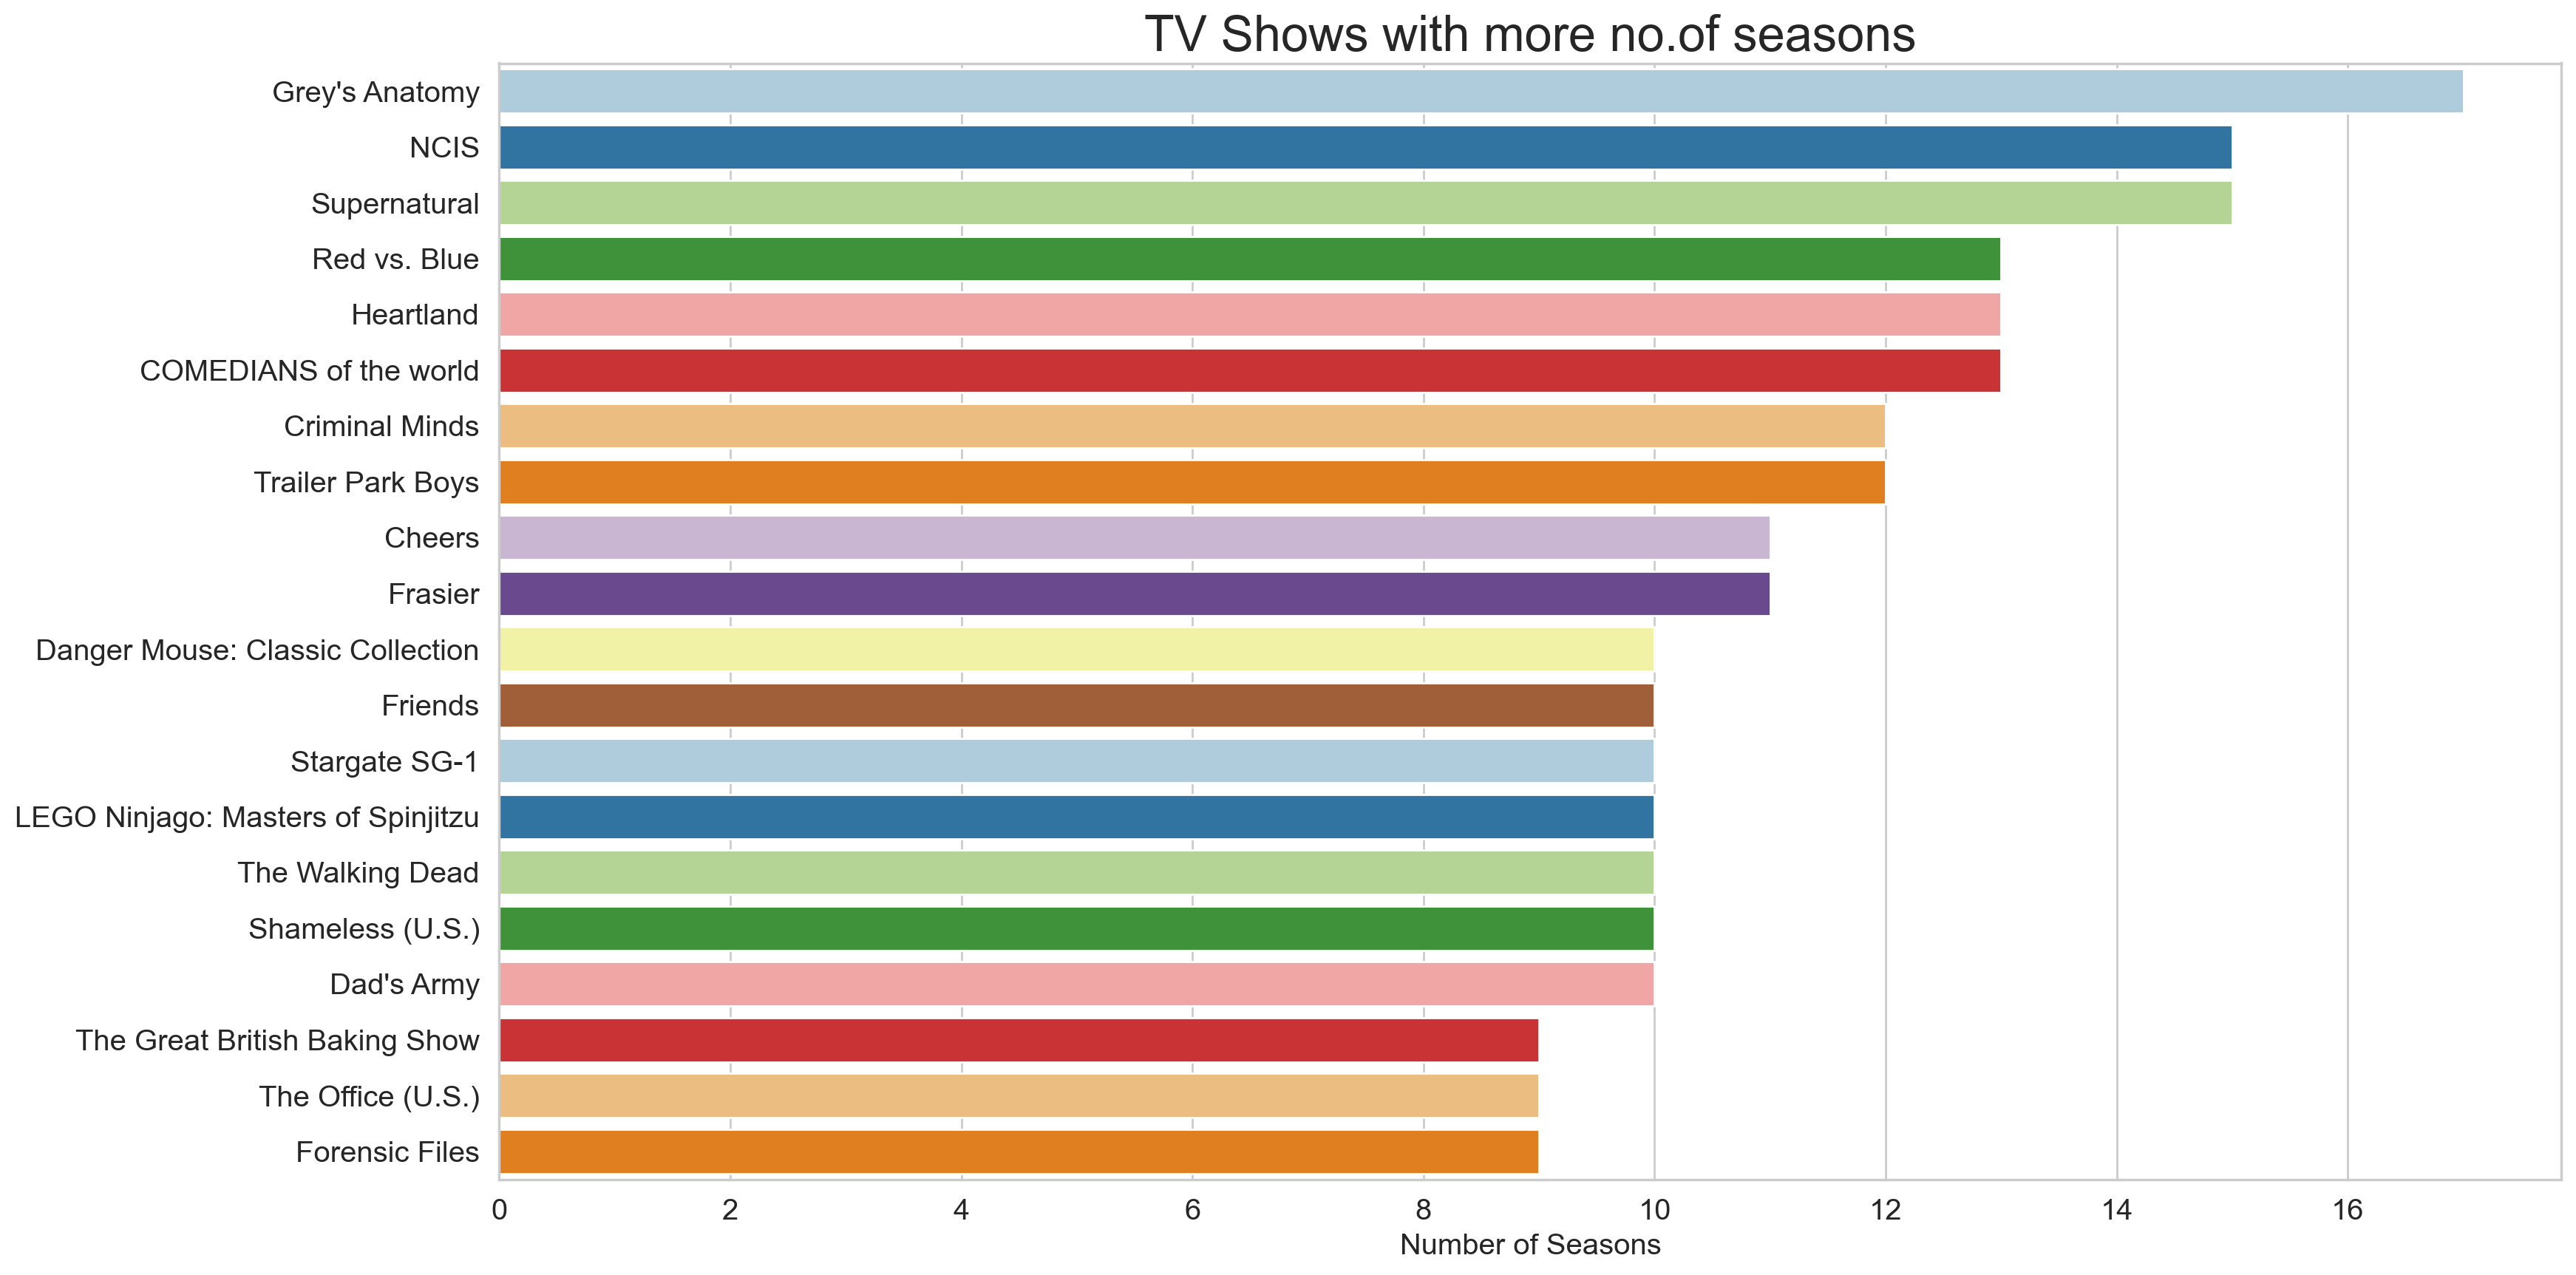

In [112]:
top_10_seasons = df_tv_show.groupby('title')['duration'].sum().sort_values(ascending = False)[:20]
plt.figure(figsize =(18,10), dpi=200)
sns.barplot(y=top_10_seasons.index,x = top_10_seasons.values, palette='Paired')
plt.title('TV Shows with more no.of seasons', fontsize=24)
plt.ylabel("")
plt.xlabel("Number of Seasons")
plt.show()

### Wordcloud for genre categories

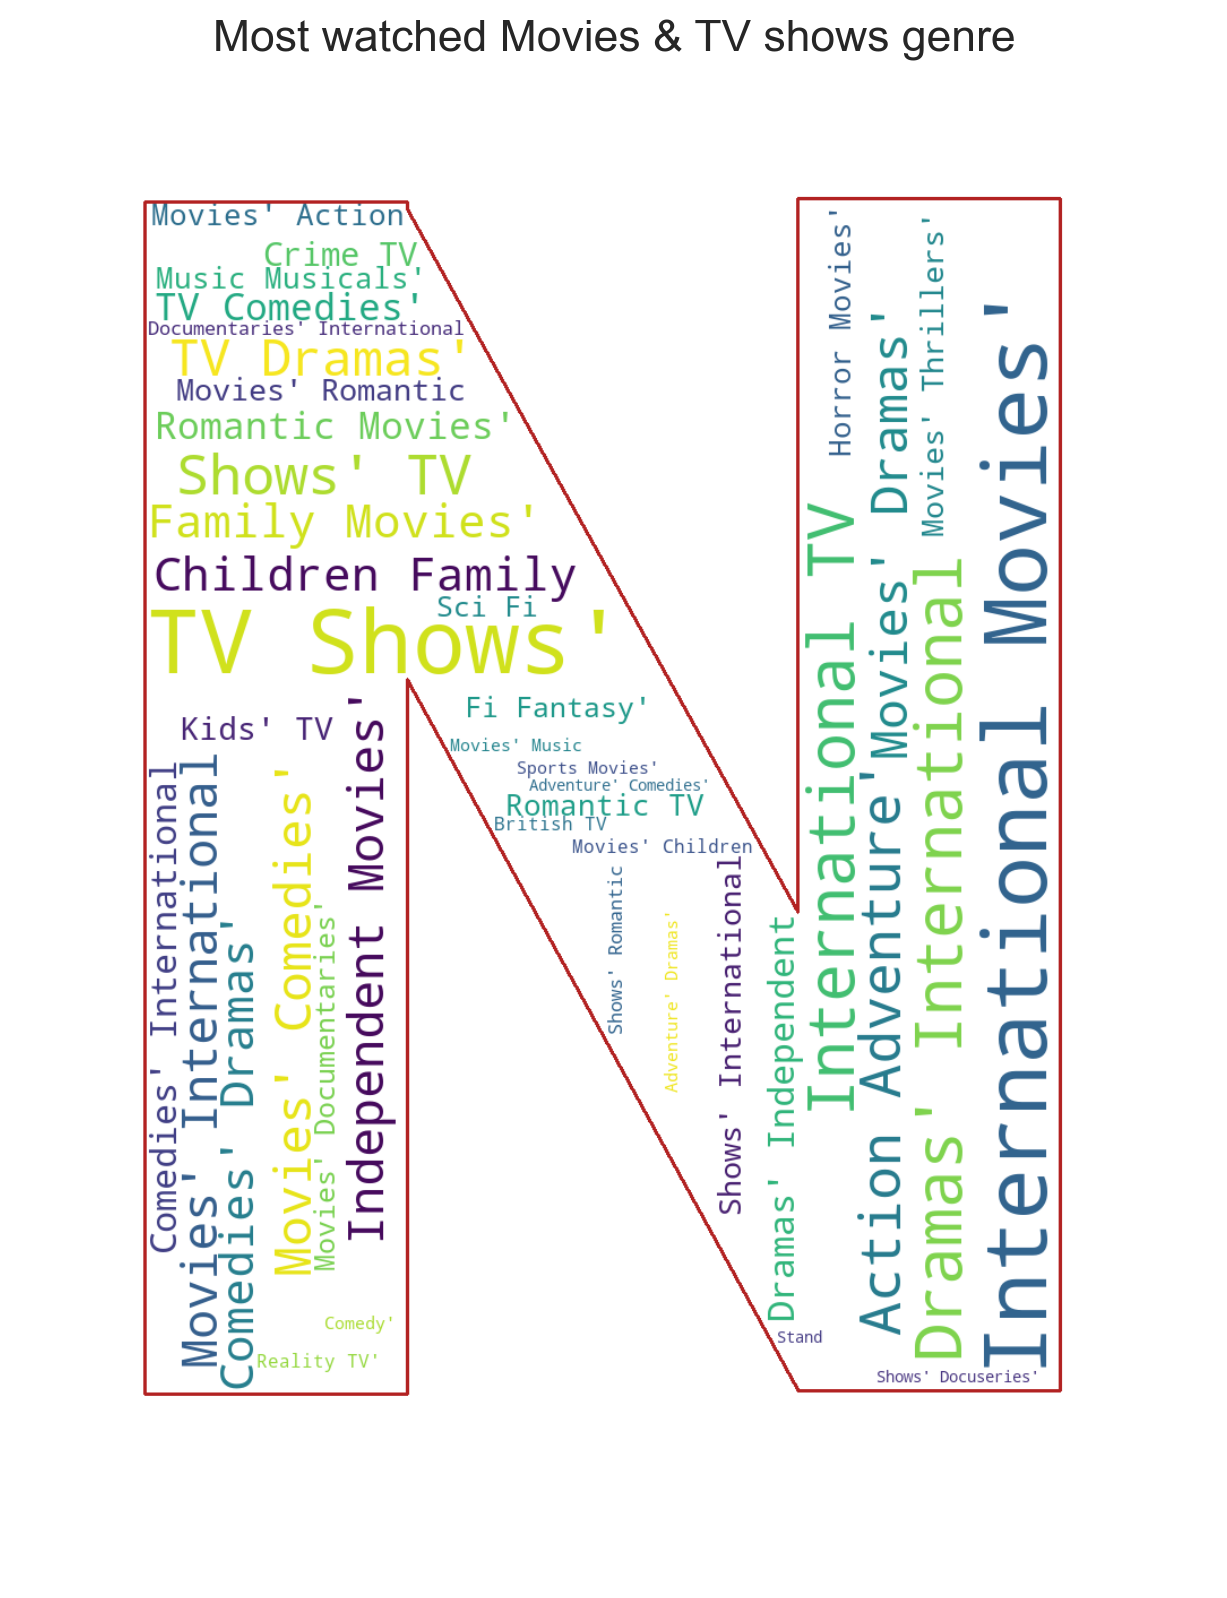

In [113]:
categories = ", ".join(df_listed_in['listed_in']).split(", ")
text = str(categories).replace(',','').replace('[','').replace("''",'').replace(']','')

def transform_format(pixel):
    return 255 if round(pixel) == 1 else pixel
    
def rgb2gray(rgb):
    # formula -> https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Image link -> https://editor.analyticsvidhya.com/uploads/36575mask.png
n_mask = np.array(plt.imread("n_mask.png"))
n_mask_gray = rgb2gray(n_mask)
transformed_n_mask = np.ndarray((n_mask_gray.shape[0], n_mask_gray.shape[1]), np.int32)

for i in range(len(n_mask_gray)):
    transformed_n_mask[i] = list(map(transform_format, n_mask_gray[i]))
    
wc = WordCloud(background_color="white", max_words=df_listed_in['listed_in'].nunique(), mask=transformed_n_mask,
               contour_width=3, contour_color='firebrick')
wc.generate(text)

plt.figure(figsize=[10,10], dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.title('Most watched Movies & TV shows genre', fontsize=16)
plt.axis("off")
plt.show()

### Wordcloud for cast members 

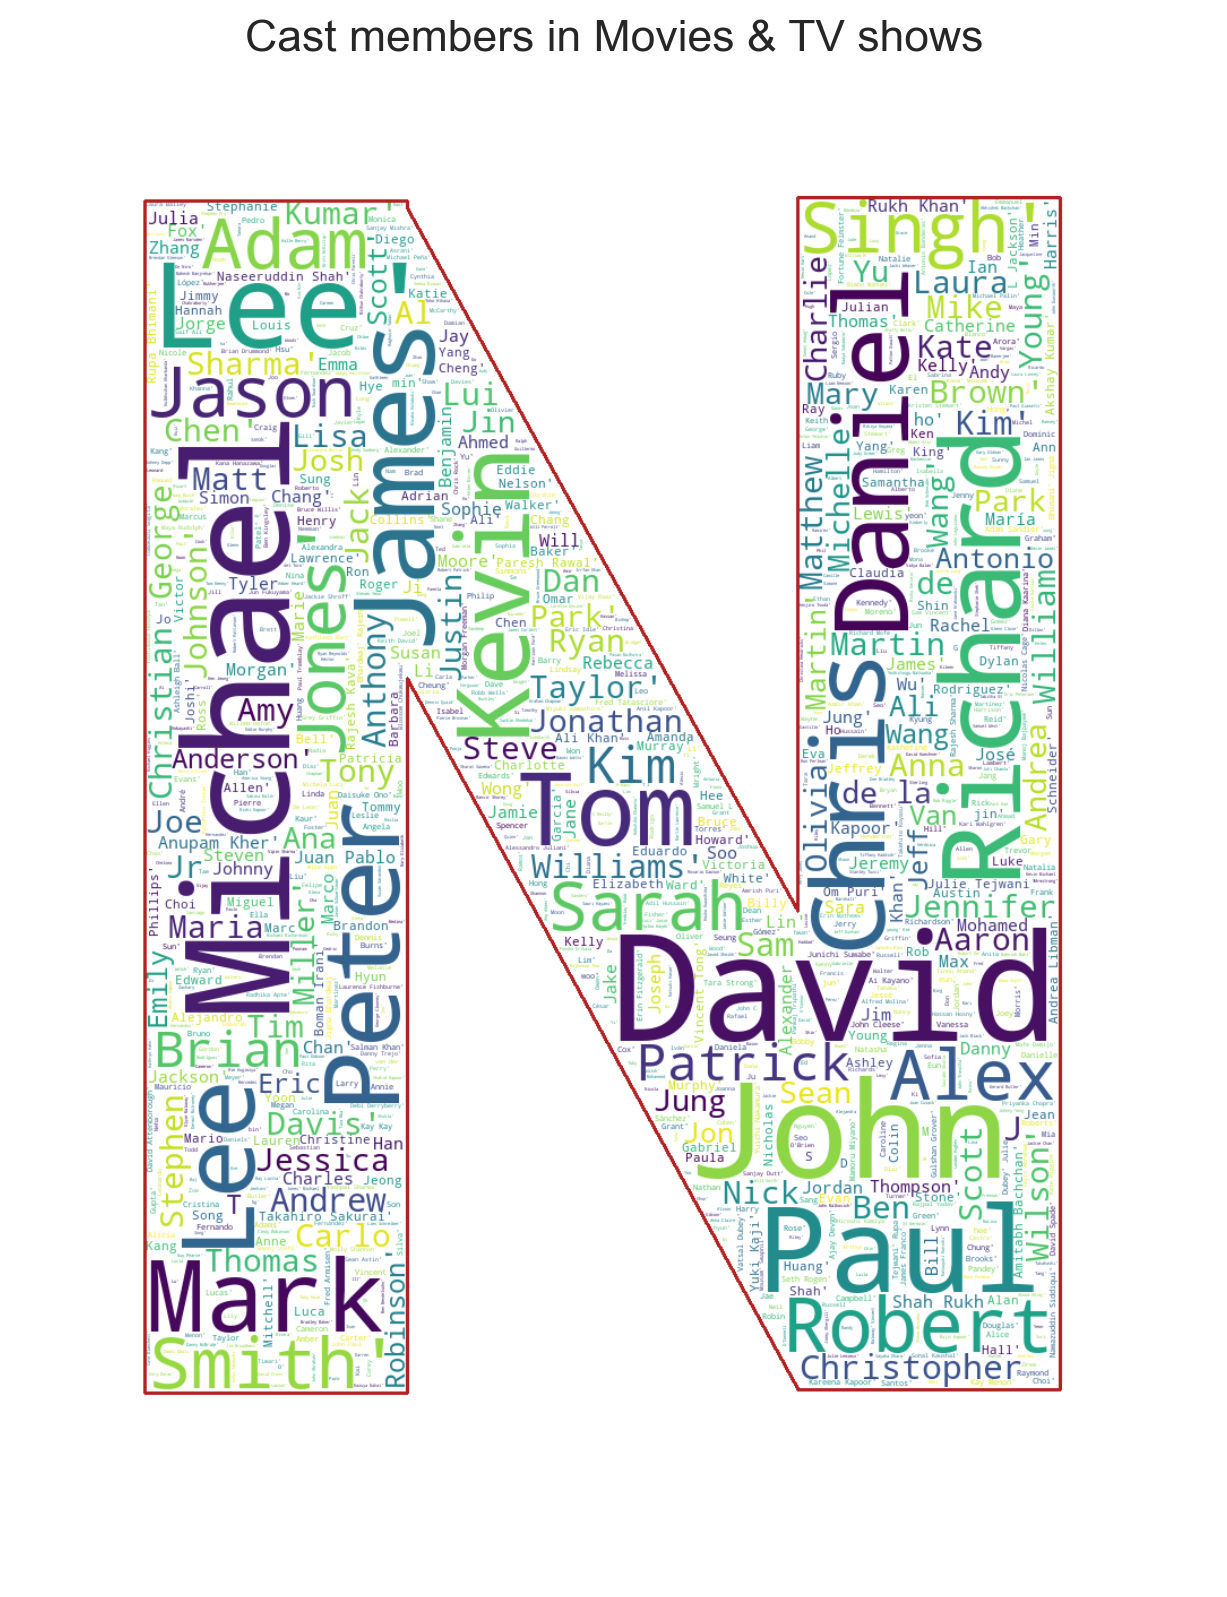

In [114]:
categories = ", ".join(df_cast['cast']).split(", ")
text = str(categories).replace(',','').replace('[','').replace("''",'').replace(']','')

def transform_format(pixel):
    return 255 if round(pixel) == 1 else pixel
    
def rgb2gray(rgb):
    # formula -> https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

n_mask = np.array(plt.imread("n_mask.png"))
n_mask_gray = rgb2gray(n_mask)
transformed_n_mask = np.ndarray((n_mask_gray.shape[0], n_mask_gray.shape[1]), np.int32)

for i in range(len(n_mask_gray)):
    transformed_n_mask[i] = list(map(transform_format, n_mask_gray[i]))
    
wc = WordCloud(background_color="white", max_words=df_cast['cast'].nunique(), mask=transformed_n_mask,
               contour_width=3, contour_color='firebrick')
wc.generate(text)

plt.figure(figsize=[10,10], dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.title('Cast members in Movies & TV shows', fontsize=16)
plt.axis("off")
plt.show()

### Wordcloud for all directors

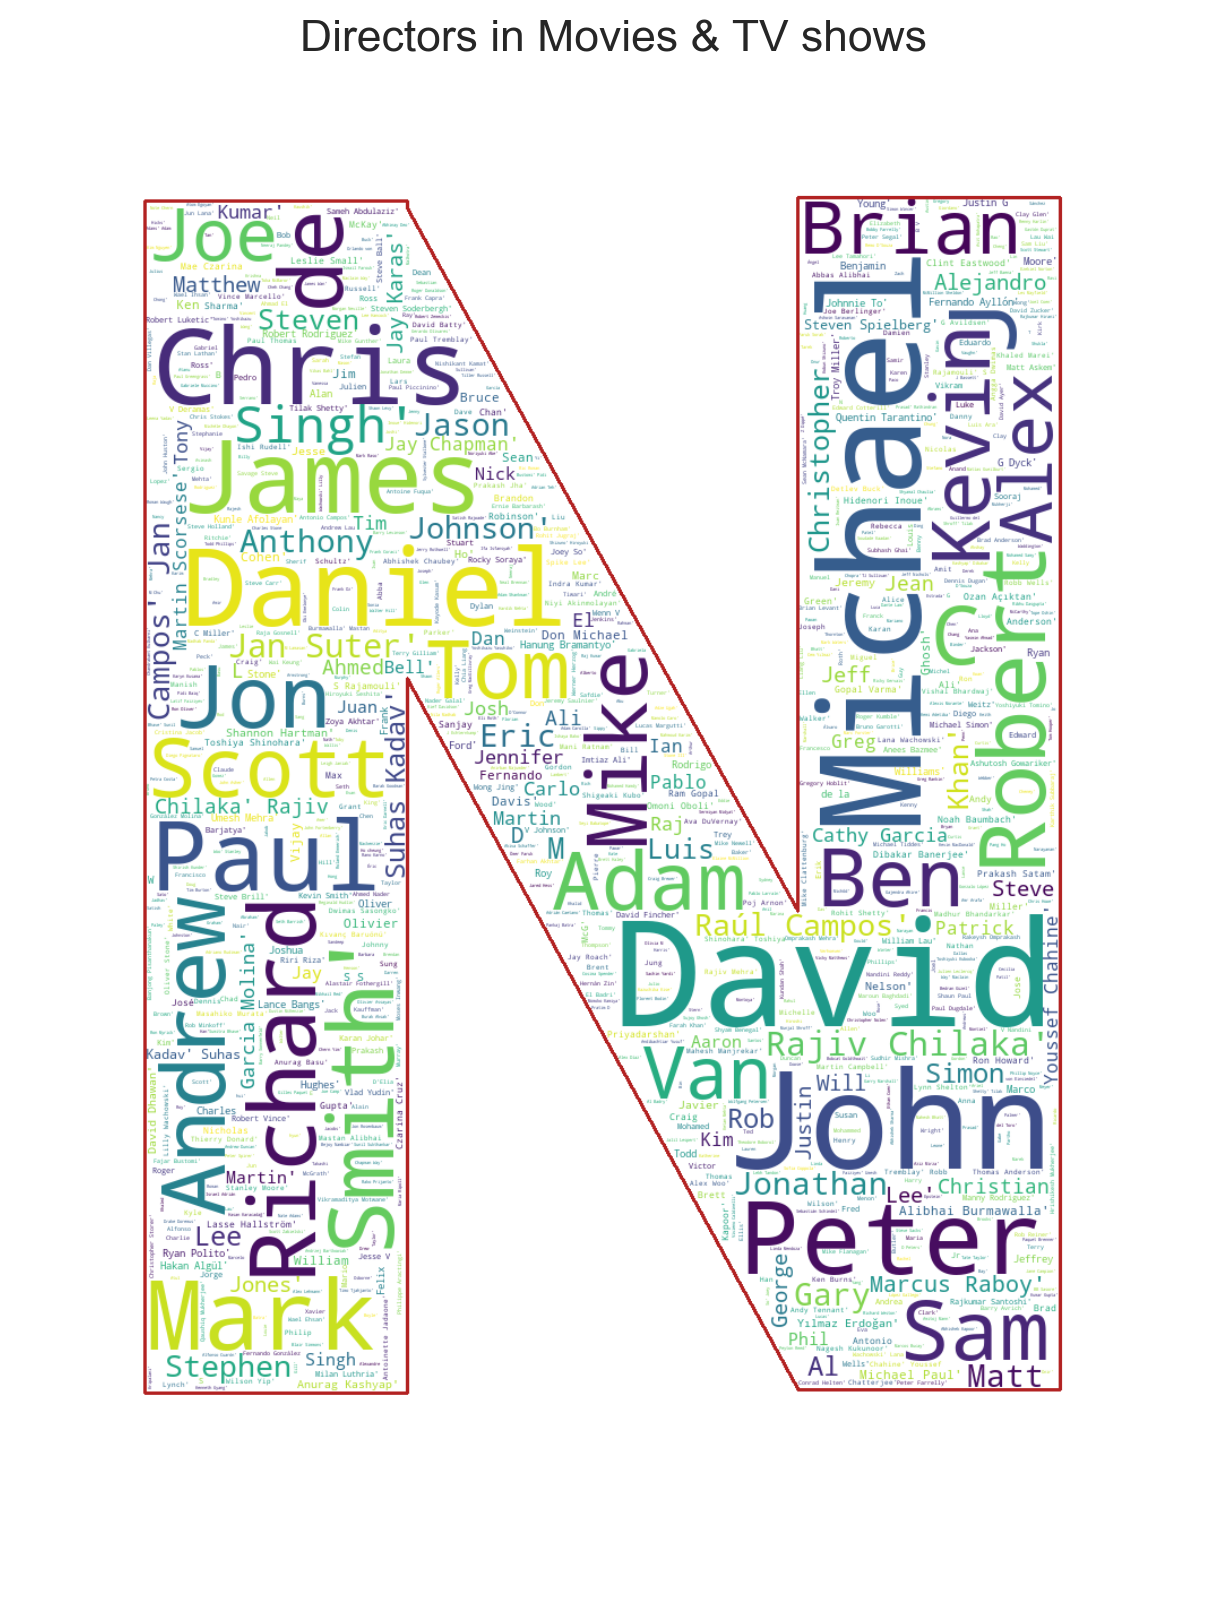

In [115]:
categories = ", ".join(df_director['director']).split(", ")
text = str(categories).replace(',','').replace('[','').replace("''",'').replace(']','')

def transform_format(pixel):
    return 255 if round(pixel) == 1 else pixel
    
def rgb2gray(rgb):
    # formula -> https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

n_mask = np.array(plt.imread("n_mask.png"))
n_mask_gray = rgb2gray(n_mask)
transformed_n_mask = np.ndarray((n_mask_gray.shape[0], n_mask_gray.shape[1]), np.int32)

for i in range(len(n_mask_gray)):
    transformed_n_mask[i] = list(map(transform_format, n_mask_gray[i]))
    
wc = WordCloud(background_color="white", max_words=df_director['director'].nunique(), mask=transformed_n_mask,
               contour_width=3, contour_color='firebrick')
wc.generate(text)

plt.figure(figsize=[10,10], dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.title('Directors in Movies & TV shows', fontsize=16)
plt.axis("off")
plt.show()

### Getting top countries with most content produced

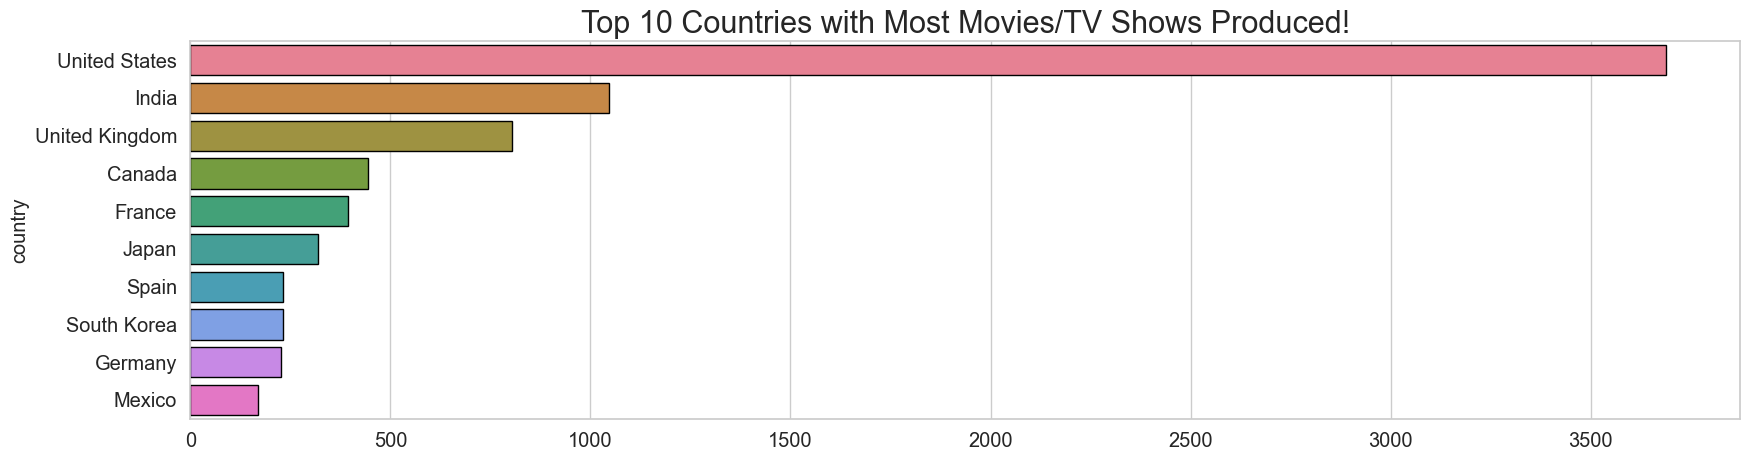

In [116]:
top_10_country = df_country['country'].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize = (20,5), dpi=100)
sns.barplot(y = top_10_country.index, x = top_10_country.values, palette = 'husl', edgecolor = 'black')
plt.title('Top 10 Countries with Most Movies/TV Shows Produced!', fontsize=22)
plt.show()

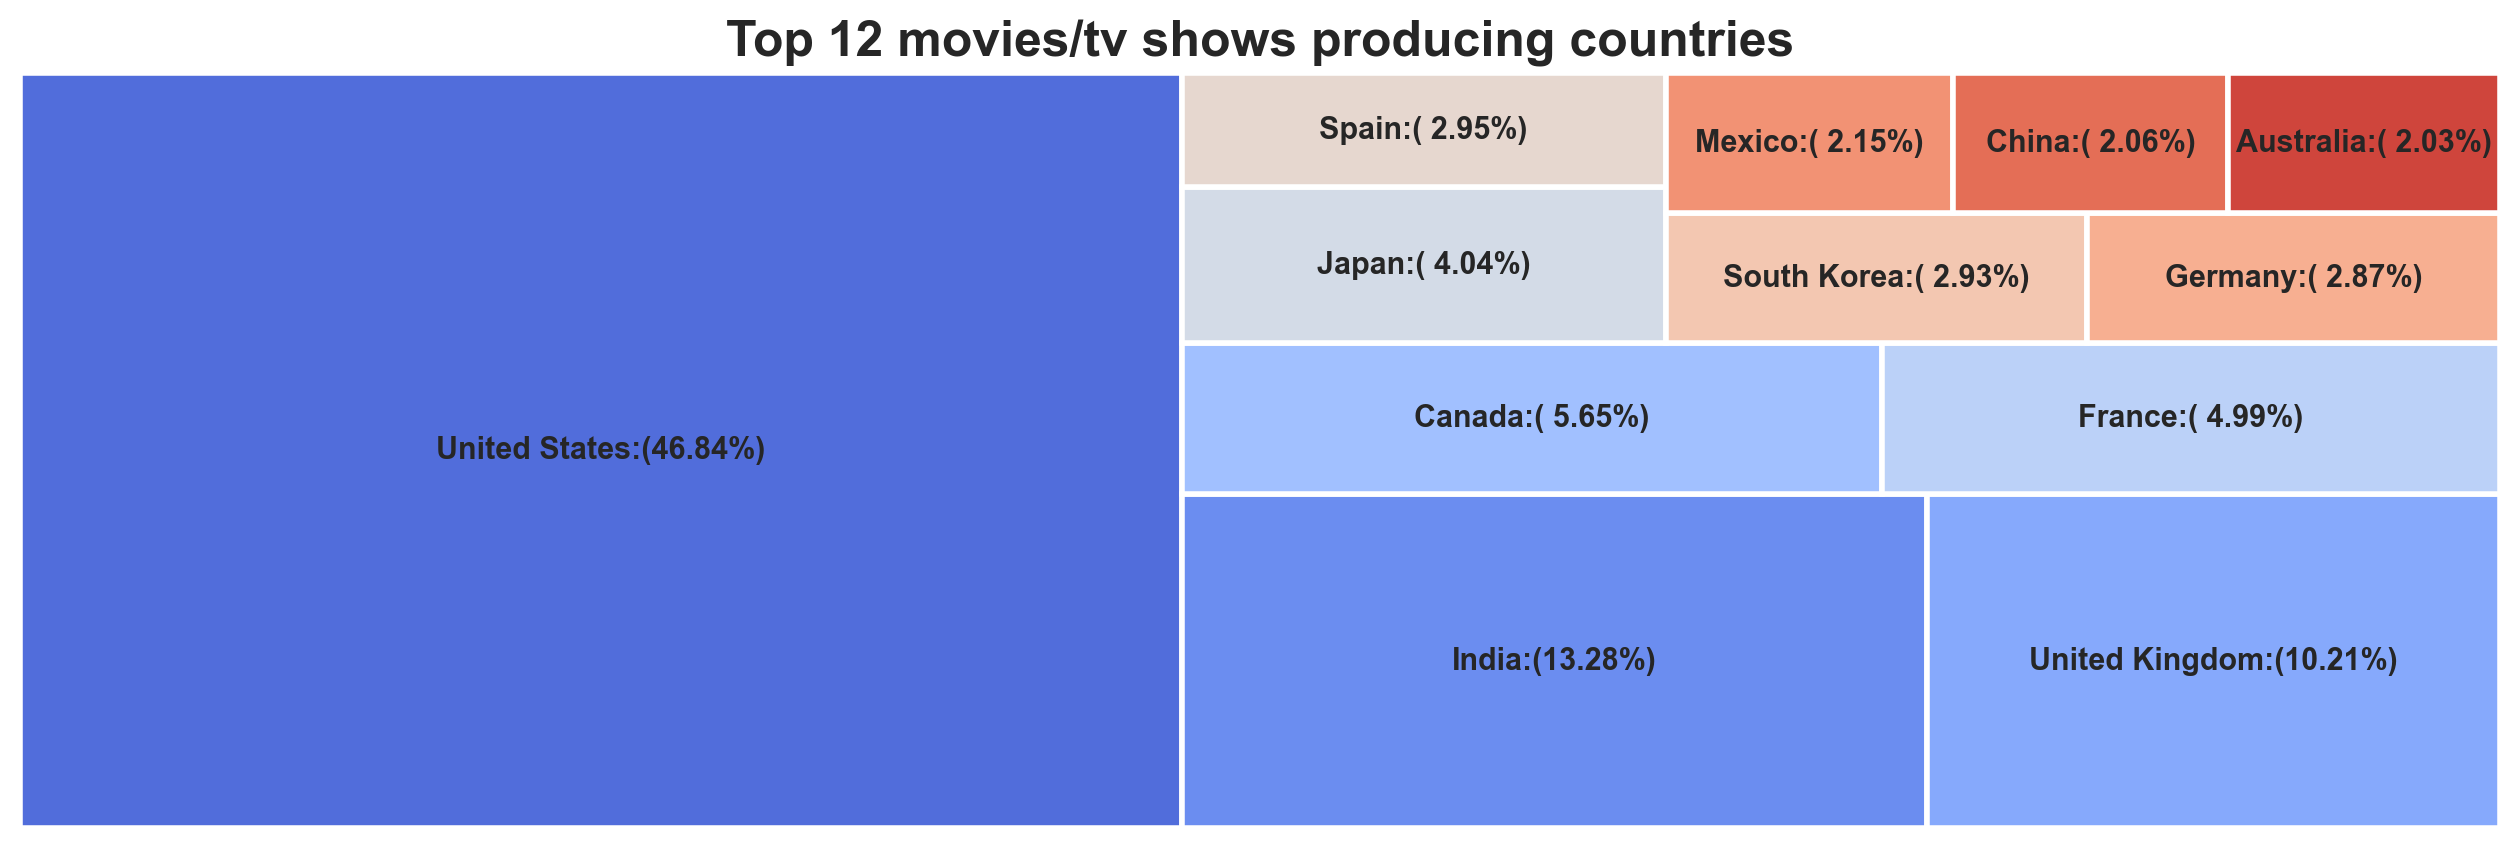

In [117]:
fig = plt.figure(figsize=(16, 5), dpi=200)

square_plot_data = df_country['country'].value_counts()[:12]
perc = [f'{i/square_plot_data.sum()*100:5.2f}%' for i in square_plot_data]
lbl = [f'{el[0]}:({el[1]})' for el in zip(square_plot_data.index, perc)]

squarify.plot(sizes = square_plot_data.values, label = lbl,
              color=sns.color_palette("coolwarm", n_colors=12),
              linewidth=2, text_kwargs={'fontsize':11, 'fontweight' : 'bold'}, alpha=1.0)
plt.title('Top 12 movies/tv shows producing countries', position=(0.5, 1.0+0.03), fontsize = 18, fontweight='bold')
plt.axis('off')
plt.show()

### Length of movie (in minutes) over the years

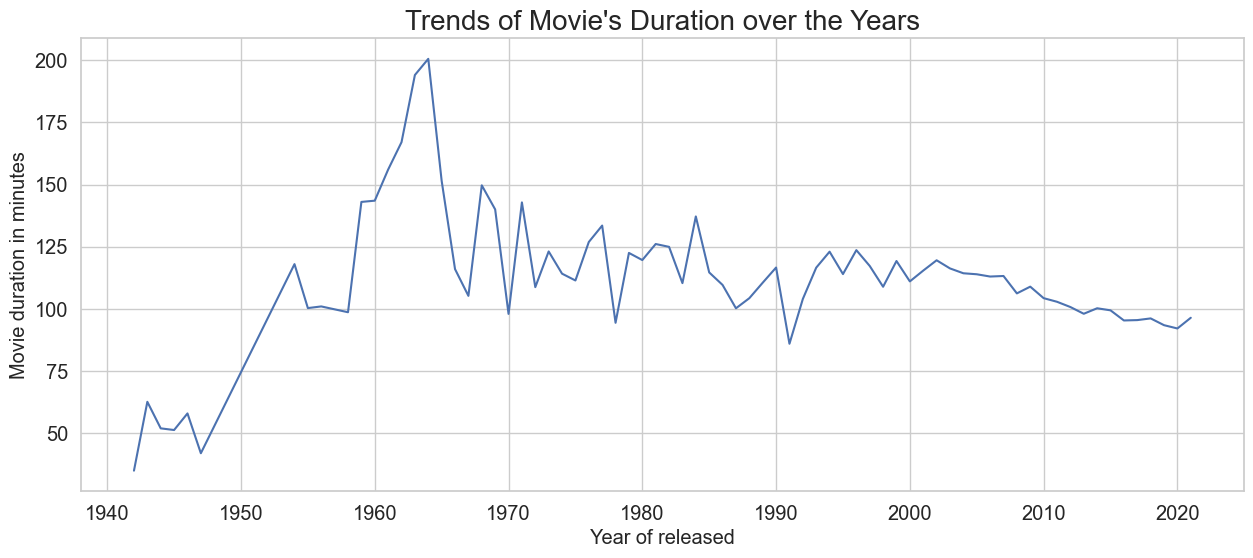

In [118]:
duration_year_movie = df_movie.groupby(['release_year'])['duration'].mean().sort_index()

plt.figure(figsize=(15,6), dpi=100)
sns.lineplot(x=duration_year_movie.index, y=duration_year_movie.values)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of released')
plt.title("Trends of Movie's Duration over the Years", fontsize=20)
plt.show()

### Length of TV SHOW (in number of seasons) over the years

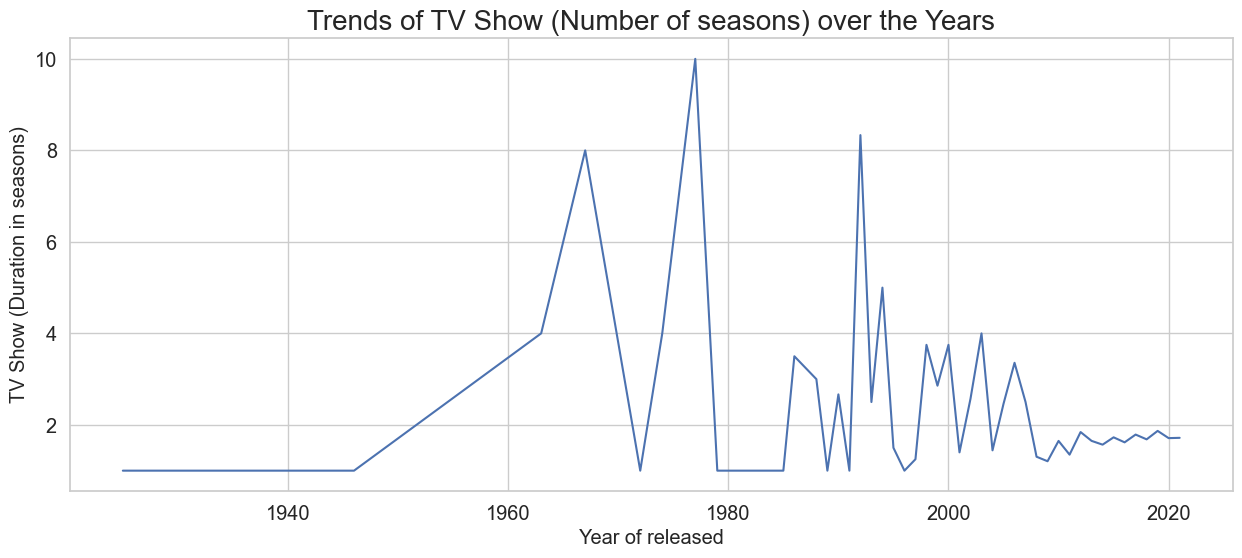

In [119]:
duration_year_tv = df_tv_show.groupby(['release_year'])['duration'].mean().sort_index()

plt.figure(figsize=(15,6), dpi=100)
sns.lineplot(x=duration_year_tv.index, y=duration_year_tv.values)
plt.ylabel('TV Show (Duration in seasons)')
plt.xlabel('Year of released')
plt.title("Trends of TV Show (Number of seasons) over the Years", fontsize=20)
plt.show()

### Understanding relationship between countries and genre produced

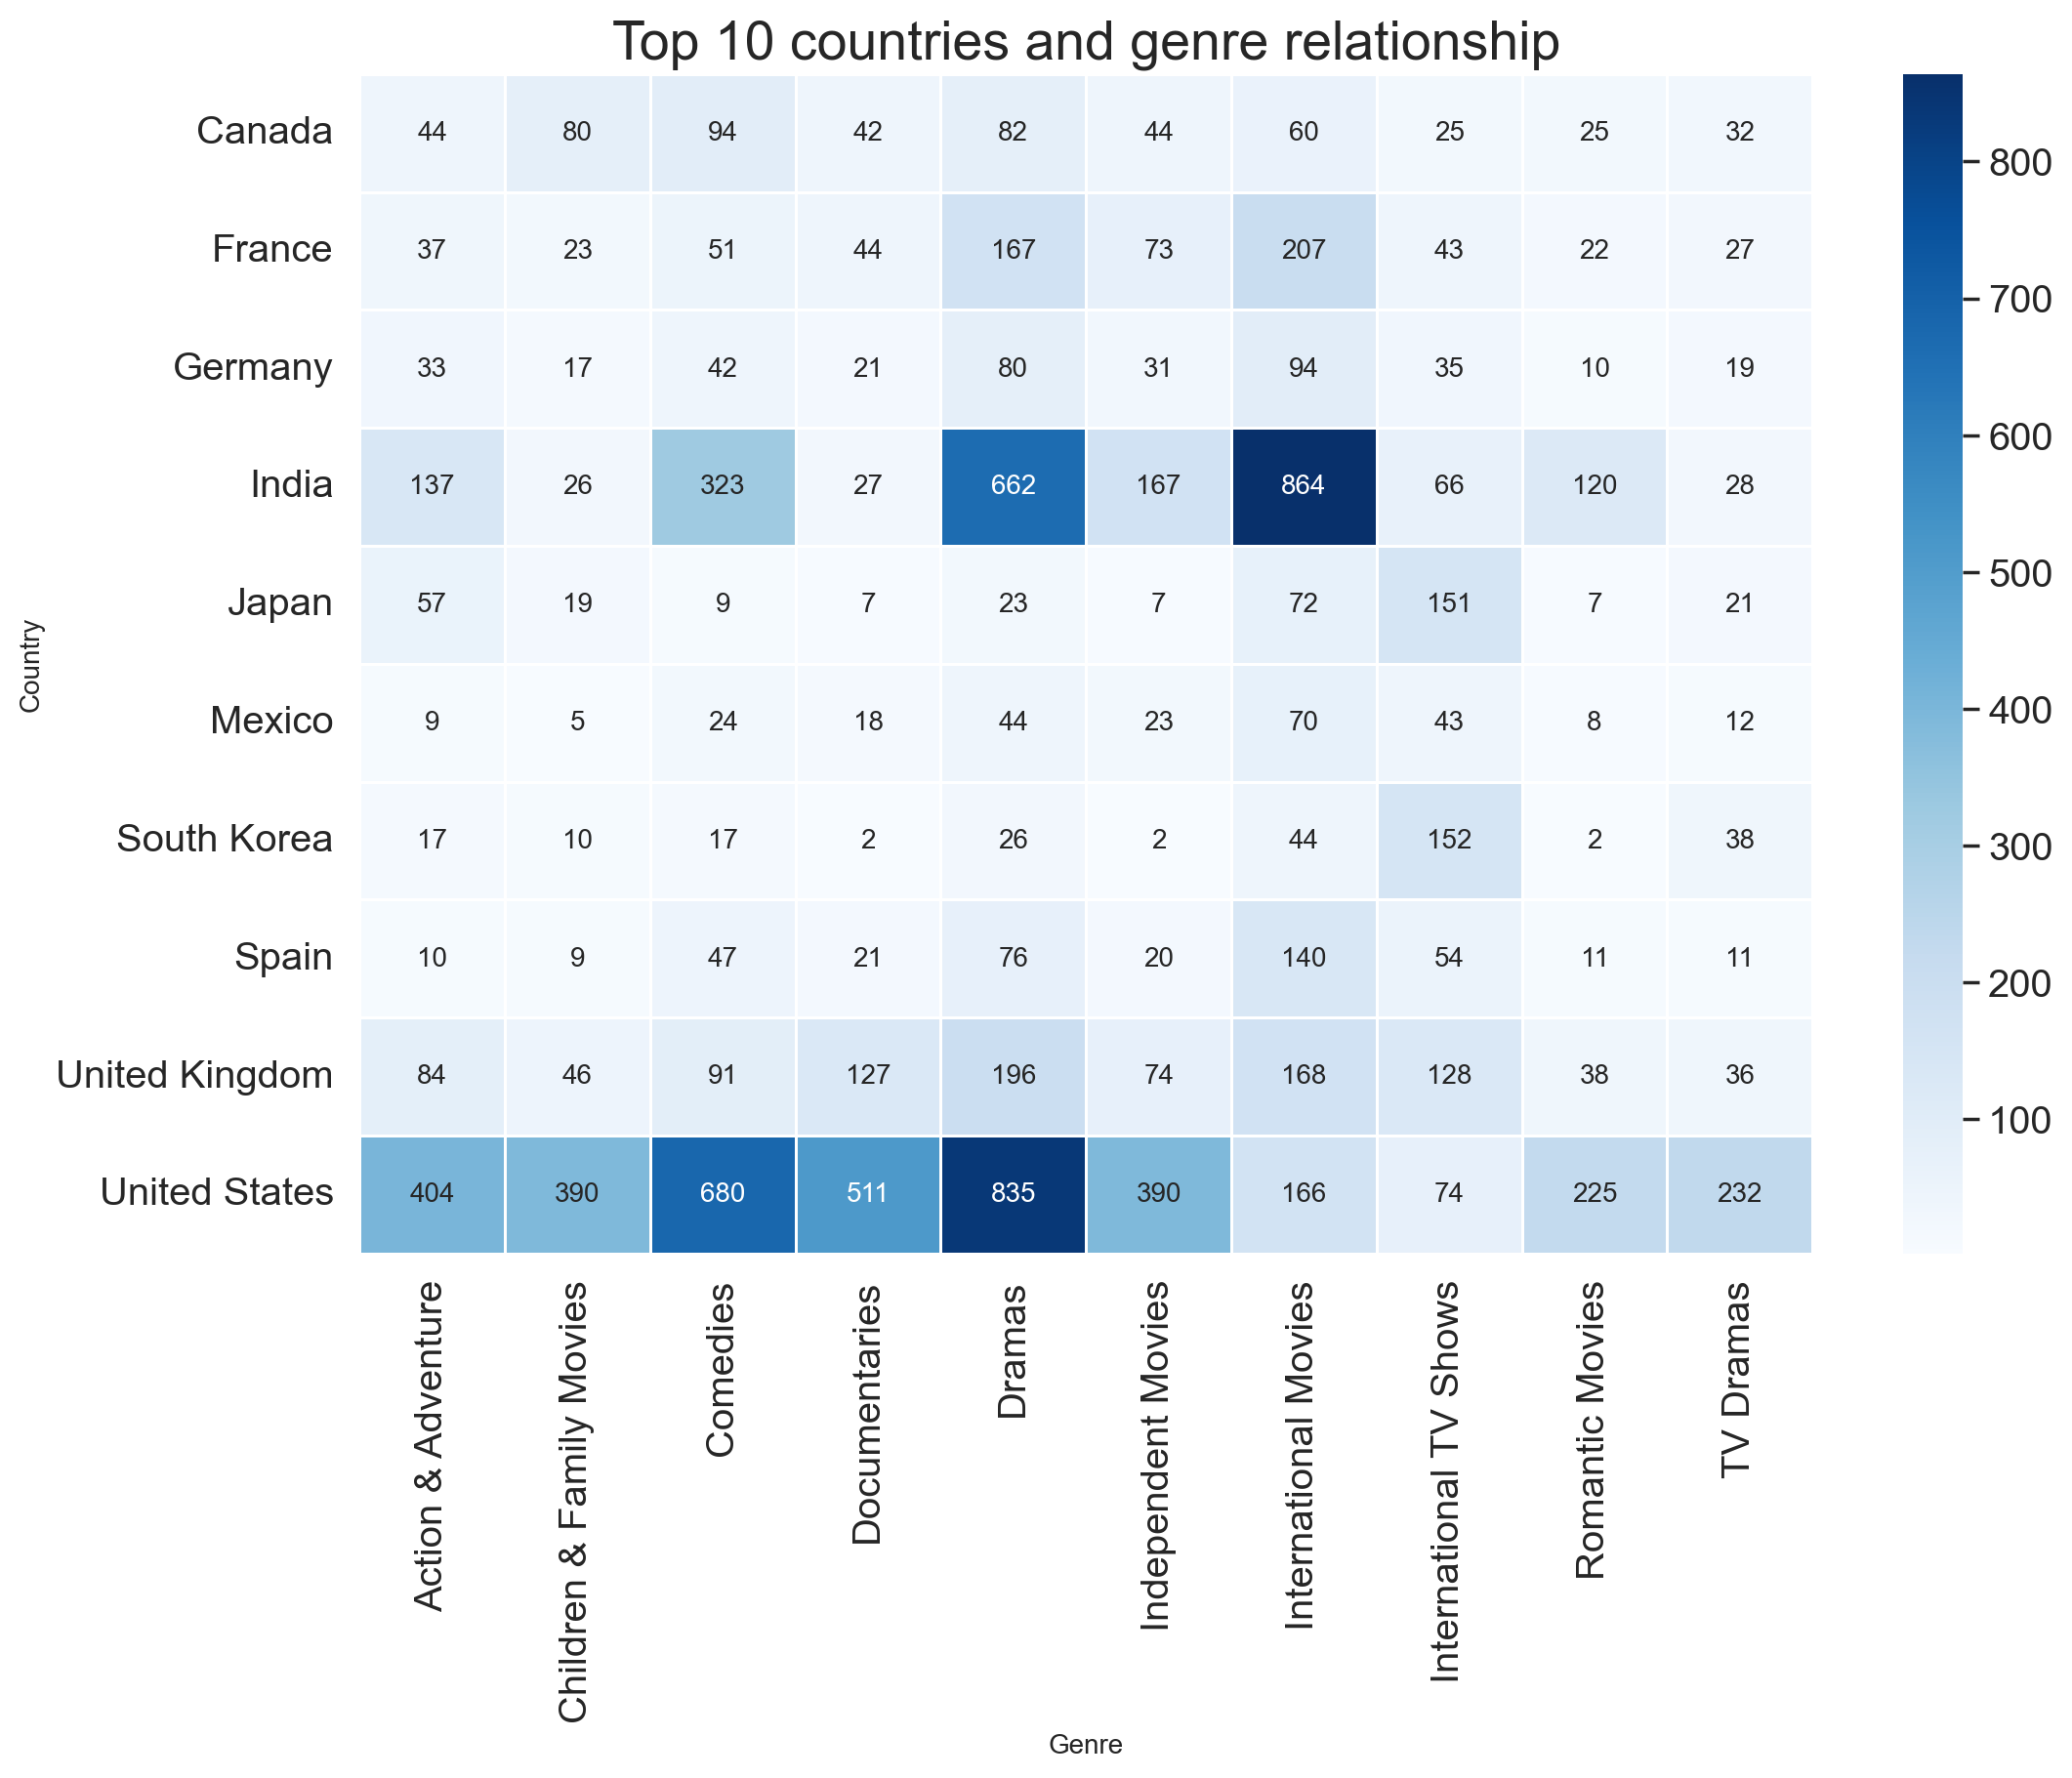

In [120]:
df_genre_country = pd.merge(df_listed_in, df_country, how='inner')

top_10_country = df_country['country'].value_counts().sort_values(ascending=False)[:10].index
top_10_genre = df_listed_in['listed_in'].value_counts().sort_values(ascending=False)[:10].index

top_10_df_genre_country = df_genre_country[df_genre_country['country'].isin(top_10_country) 
                                           & df_genre_country['listed_in'].isin(top_10_genre)]

plt.figure(figsize=(12, 8), dpi=200)
heat_map_df = top_10_df_genre_country.groupby('country')['listed_in'].value_counts().unstack()
sns.heatmap(data=heat_map_df, annot=True, cmap='Blues', linewidths=1, fmt='g')

plt.title('Top 10 countries and genre relationship', fontsize=20)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.show()

### Pair plots for bi-variate analysis of continuous columns

<Figure size 8000x4000 with 0 Axes>

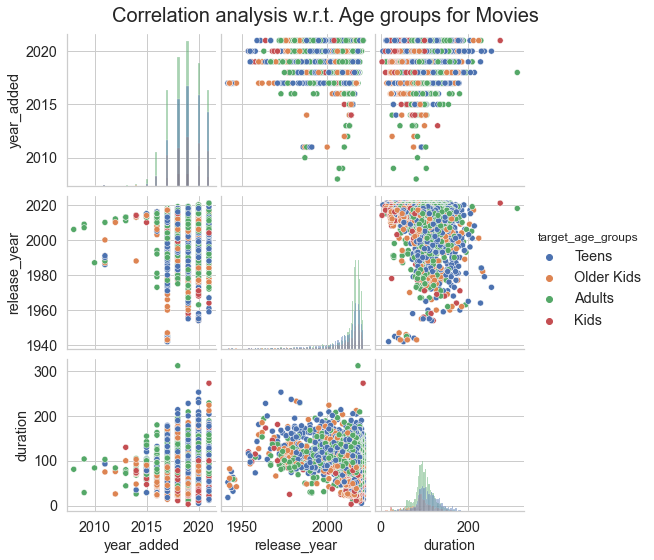

In [121]:
df_movie_pairplot = df_movie[['year_added', 'release_year', 'duration', 'target_age_groups']]

plt.figure(figsize=(20, 10), dpi=400)
sns.pairplot(data=df_movie_pairplot, hue='target_age_groups', diag_kind="hist")
plt.suptitle('Correlation analysis w.r.t. Age groups for Movies', fontsize=20, position=(0.5, 1.0+0.03))
plt.show()

<Figure size 8000x4000 with 0 Axes>

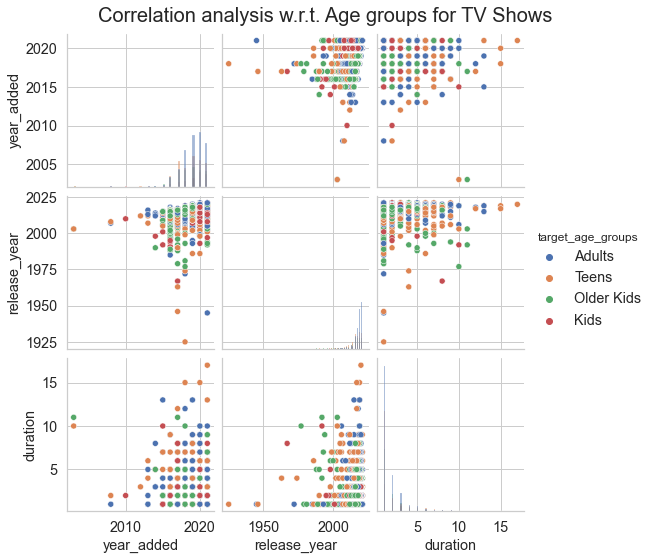

In [122]:
df_tv_show_pairplot = df_tv_show[['year_added', 'release_year', 'duration', 'target_age_groups']]

plt.figure(figsize=(20, 10), dpi=400)
sns.pairplot(data=df_tv_show_pairplot, hue='target_age_groups', diag_kind="hist")
plt.suptitle('Correlation analysis w.r.t. Age groups for TV Shows', fontsize=20, position=(0.5, 1.0+0.03))
plt.show()

### Movie/Tv show releases and added on netflix comparison wrt age groups

<Figure size 800x800 with 0 Axes>

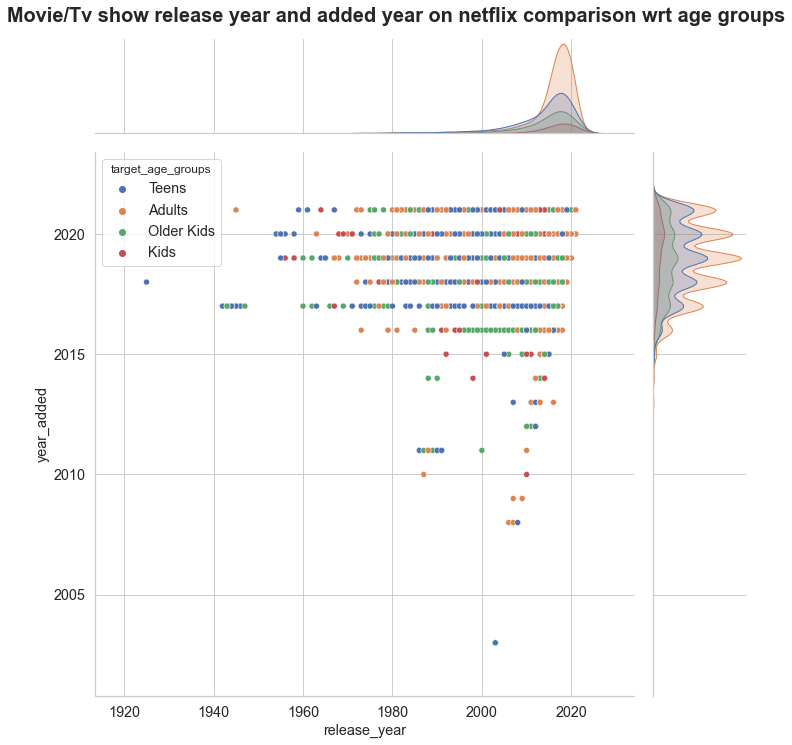

In [123]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='release_year', y='year_added', data=df, hue='target_age_groups', height=10)
plt.suptitle('Movie/Tv show release year and added year on netflix comparison wrt age groups',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

### Business Insights

- Over the years, both TV shows and movie contents addition has increased till 2018, but after 2018 it has started declining may be due to Covid.
- Number of Movies added is more compare to TV shows over the years but for 2021, more TV shows were added on netflix.
- There is a 70:30 ratio of Movies and TV Shows content in Netflix platform as of 2021.
- Most of the TV show content gets added in december,  june and july months. Similar pattern for movies but in addition november and april months as well.
- It was evident that 1st of every month was when the most content was added.
- Indian actors like Anupam Kher, Shah Rukh Khan, Naseeruddin Shah and Akshay Kumar occupy the top spot with most movies.
- Rajiv Chilaka, Jan Suter and Raul Campos are the most popular movie directors across Netflix.
- Most movie & TV show content is made of TV-MA rating i.e. for mature/adult audience.
- International Movies, Dramas and Comedies are the most popular are most popular Genre amongst both type of content.
- US, India, UK, Canada and France are leading countries in Content Creation on Netflix.
- From year 2017 and ahead, content added on netflix surpasses number of releases. This is due to addition of more and more old movies and netflix original TV shows.
- Duration of movies made for teens is the highest. Duration for kids’ movies are the shortest amongst all content.
- Mostly adult TV shows are made. And TV shows are mostly made for 1 season. Grey Anatomy has the highest number of seasons.
- Movie duration kept increasing from 1965 but after that usually 100-150 minutes movies are made.
- From year 1965 to 1985, TV shows were made of atleast 6-8 season but from last years data, we can conclude only 1-4 seasons are being made per TV show.
- Amongst leading countries like Unites States, India. Both nations like comedy and drama movies more.
- United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.


### Recommendations
- The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so recommended to generate more content on these genres.
- Add TV Shows/ Movies in the mid months like june, july & august or at the end of year.
- Add Movies & TV shows for variety of audience, it has been declining since 2018.
- While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.
- For audience,  80-120 mins is the recommended length for movies. And 2-4 seasons are recommended length of TV shows.